# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


# Import modules

In [2]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


# API for students

In [3]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [4]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data


In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


## Description of attributes

This may be somewhat unhelpful for those not used to reading Financial Statements.

However the point is the following:
- We can *still* perform Machine Learning *even if* We are not an expert in the problem domain
- Of course: becoming an expert in the domain *will improve* the ability to create better models
    - Feature engineering is easier if we understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data and see what is the type of each attribute


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

This is a messy data !  
The dataset has represented numbers as strings.

# Project Evaluation cirteria and format

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [7]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.

So choose one (explain why !) and obey the following guidelines.

The objective of creating the guideline is to simplify the evaluation of your model.

We have specified this by requiring you to implement a function called `MyModel`
- which takes an unlabeled holdout dataset (one example per row)
- and returns an array of predictions (one per holdout example)

We will evaluate your model by passing a holdout dataset into your implemention of `MyModel`

- obtaining predictions
- evaluating the predictions against metrics such as Accuracy and Recall











To be specific:

You will implement the body of a subroutine `MyModel`

The subroutine
- takes as argument a Pandas DataFrame 
    - Each row is an example on which to predict
    - The features of the example are elements of the row
- Performs predictions on each example
- Returns an array of predictions with a one-to-one correspondence with the examples in the test set

Here is what `MyModel` should look like:

In [ ]:
def MyModel(data, other={}):
    """
    Parameters
    -----------
    data: a Pandas DataFrame
    other: a dict
        You can use this to pass any other arguments you find are necessary
        
    Returns
    -------
    pred: an array of predicted values
        The number of elements (i.e., predictions) is equal to the number of examples in the 'data' parameter
            i.e., one prediction per example
    """
    
    # The function should create an array of predictions; we initialize it to the empty array for convenience
    pred = []
    
    # YOUR CODE HERE
    
    
    return pred

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold, other)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

# START OF THE PROJECT

From the previous section, we saw that most attributes of the features were objects instead of float types.  
First lets convert the objects into floats.

In [10]:
data = data.apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

# Exploratory Data Analysis

In [11]:
data.isna().sum()
data.head()
numeric_cols = [f'X{i}' for i in range(1, 65)]


print("BANKRUPTCY PREDICTION - EXPLORATORY DATA ANALYSIS")
print(f"\nDataset Shape: {data.shape}")
print(f"Number of Features: {data.shape[1] - 2}")  # Excluding Bankrupt and Id
print(f"Number of Samples: {data.shape[0]}")

X1           2
X2           2
X3           2
X4          15
X5          10
            ..
X62          0
X63         15
X64         83
Bankrupt     0
Id           0
Length: 66, dtype: int64

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.417690,0.05680,1.1605,-126.390,0.413550,0.025417,1.23950,1.16500,0.51773,...,0.049094,0.85835,0.123220,5.6167,7.4042,164.310,2.2214,1.3340,0,4510
1,-0.023834,0.210100,0.50839,4.2374,22.034,0.058412,-0.027621,3.65790,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.8020,6.4782,0,3537
2,0.030515,0.446060,0.19569,1.5650,35.766,0.281960,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.252660,15.0490,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.6800,438.200,0.136490,0.058164,10.85300,1.02790,0.61173,...,0.085524,0.97282,0.000000,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.497120,0.12316,1.3036,-71.398,0.000000,0.001007,1.01160,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.5820,114.580,3.1854,2.7420,0,1529


BANKRUPTCY PREDICTION - EXPLORATORY DATA ANALYSIS

Dataset Shape: (4818, 66)
Number of Features: 64
Number of Samples: 4818


It seems that there are some missing values in some columns.  
Also, the Id column is not necessary for the Exploratory Data Analysis as it does not have any predictive value and is an arbitrary company itdentifier.  
Lets drop the ID column and do some exploratory data analysis.
First lets see if the data is imbalanced.

In [12]:
data = data.drop('Id', axis=1)

<Figure size 1000x400 with 0 Axes>

<Axes: >

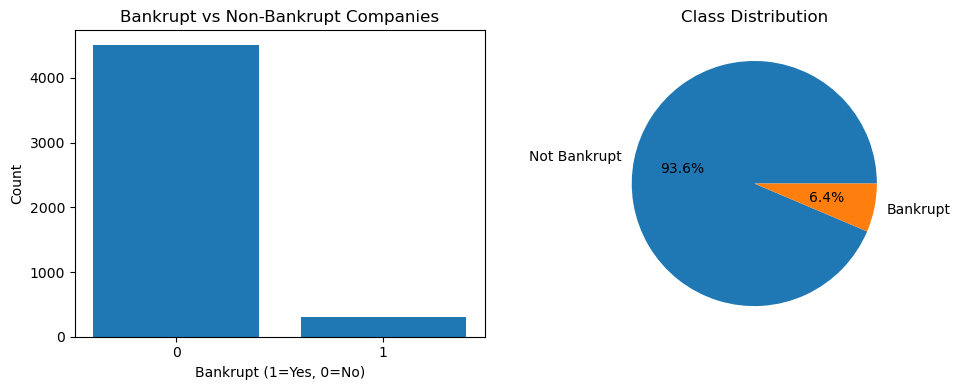

Class distribution:
Bankrupt
0    4510
1     308
Name: count, dtype: int64
Percentage:
Bankrupt
0    93.607306
1     6.392694
Name: count, dtype: float64


In [13]:
# 1. Target variable distribution
plt.figure(figsize=(10, 4))

# Left plot - Bar chart
plt.subplot(1, 2, 1)
bankrupt_counts = data['Bankrupt'].value_counts()
_=plt.bar(bankrupt_counts.index, bankrupt_counts.values)
_=plt.title('Bankrupt vs Non-Bankrupt Companies')
_=plt.xlabel('Bankrupt (1=Yes, 0=No)')
_=plt.ylabel('Count')
_=plt.xticks([0, 1])  # Ensure both categories show

# Right plot - Pie chart
_=plt.subplot(1, 2, 2)
_=plt.pie(bankrupt_counts.values, labels=['Not Bankrupt', 'Bankrupt'], autopct='%1.1f%%')
_=plt.title('Class Distribution')

plt.tight_layout()
plt.show()

print("Class distribution:")
print(bankrupt_counts)
print("Percentage:")
print(bankrupt_counts / len(data) * 100)

It seems that the data is very imbalanced with 93.6% of non bankrupt and 6.4% bankrupt companies.  
Lets see if the in sample and out of sample distributions are the same

<Figure size 1600x1200 with 0 Axes>

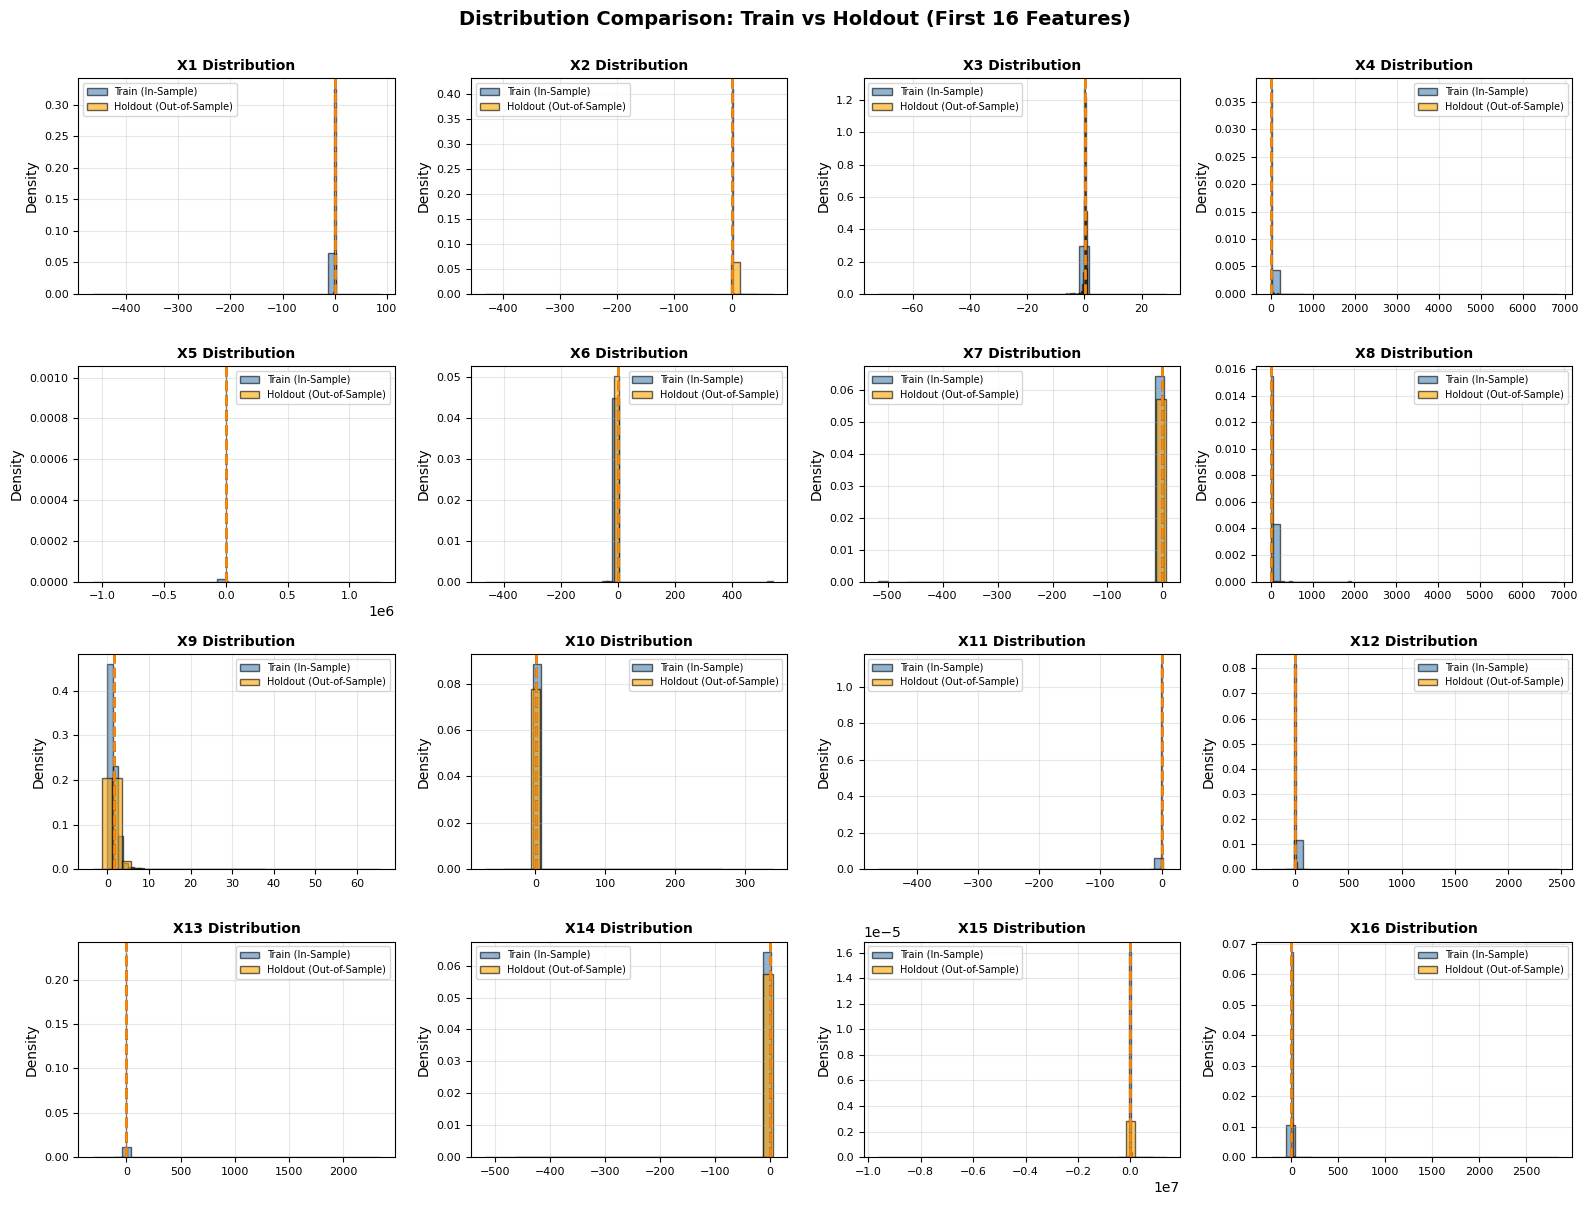

In [14]:
holdout_data = holdout_data.apply(pd.to_numeric, errors='coerce')
# Plot first 16 features
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:16]):
    _=plt.subplot(4, 4, i+1)
    
    # Get data from both datasets
    train_data = data[col].dropna()
    holdout_data_col = holdout_data[col].dropna()
    
    # Overlapping histograms
    _=plt.hist(train_data, bins=30, alpha=0.6, color='steelblue', 
             edgecolor='black', label='Train (In-Sample)', density=True)
    _=plt.hist(holdout_data_col, bins=30, alpha=0.6, color='orange', 
             edgecolor='black', label='Holdout (Out-of-Sample)', density=True)
    
    # Add mean lines
    _=plt.axvline(train_data.mean(), color='darkblue', 
                linestyle='--', linewidth=2)
    _=plt.axvline(holdout_data_col.mean(), color='darkorange', 
                linestyle='--', linewidth=2)
    
    _=plt.title(f'{col} Distribution', fontsize=10, fontweight='bold')
    _=plt.xlabel('')
    _=plt.ylabel('Density')
    _=plt.tick_params(labelsize=8)
    _=plt.legend(fontsize=7)
    _=plt.grid(alpha=0.3)

_=plt.suptitle('Distribution Comparison: Train vs Holdout (First 16 Features)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

The in sample and out of sample distributions seems to be very similar.  
However, the large range of the X axis suggest that there are some extreme outliers.  
Before looking at the outliers in detail, lets see if there are any missing values.

Missing Values Summary:
     Missing Count  Missing Percentage
X37           2068           42.922374
X27            305            6.330428
X45            220            4.566210
X60            220            4.566210
X24            116            2.407638
X28             83            1.722707
X53             83            1.722707
X64             83            1.722707
X54             83            1.722707
X21             74            1.535907
X41             62            1.286841
X32             42            0.871731
X52             32            0.664176
X47             31            0.643421
X4              15            0.311333
X12             15            0.311333
X63             15            0.311333
X46             15            0.311333
X33             15            0.311333
X40             15            0.311333
X26             14            0.290577
X16             14            0.290577
X50             14            0.290577
X34             14            0.290577
X

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Missing Values by Feature (%)')

Text(0, 0.5, 'Percentage Missing')

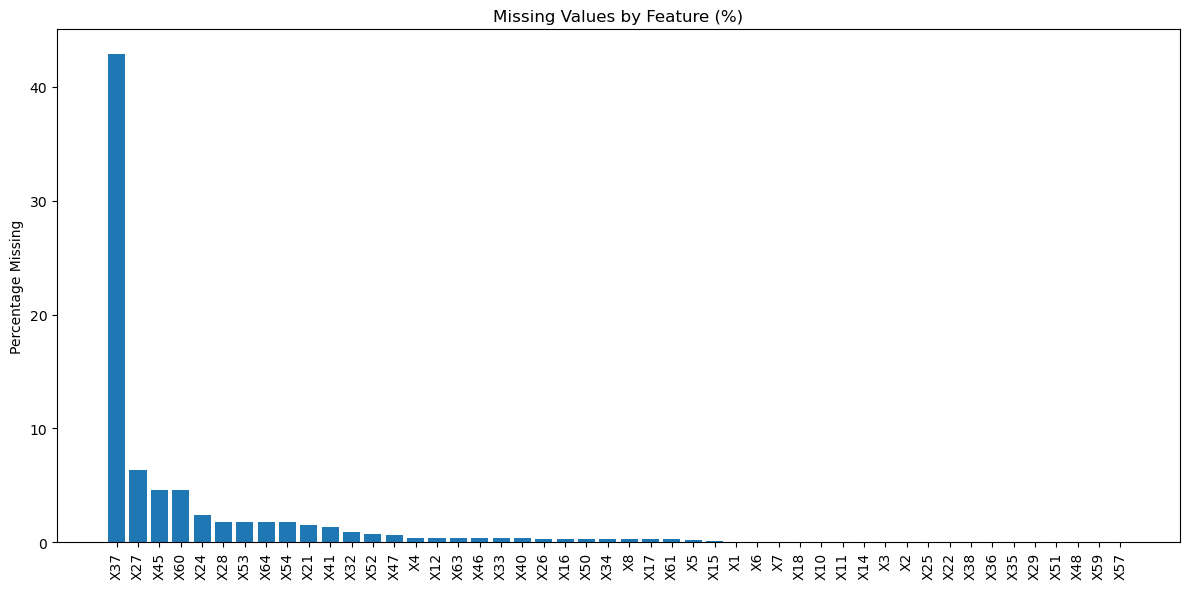

In [15]:
# 2. Missing values analysis
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100

print("Missing Values Summary:")
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_plot_data = missing_percent[missing_percent > 0].sort_values(ascending=False)
_=plt.bar(missing_plot_data.index, missing_plot_data.values)
_=plt.xticks(rotation=90)
plt.title('Missing Values by Feature (%)')
plt.ylabel('Percentage Missing')
plt.tight_layout()
plt.show()


X37, (current assets - inventories) / long-term liabilities, has a unusually have a high amount of missing value percentage.  
It may be a good idea to drop the X37 feature entirely due to over 40% of the feature value being missing.  
Other features wth around 4~7 % missing values could be manageble with some imputation. 

Lets see how many outliers there are in the features.

In [16]:
print("BASIC STATISTICS FOR NUMERICAL FEATURES")

# Convert to numeric for analysis
numeric_cols = [f'X{i}' for i in range(1, 65)]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Basic statistics
print(data[numeric_cols].describe())

BASIC STATISTICS FOR NUMERICAL FEATURES
                X1           X2           X3           X4            X5  \
count  4816.000000  4816.000000  4816.000000  4803.000000  4.808000e+03   
mean     -0.055232     0.533272     0.188992     4.978602  1.956441e+01   
std       6.707351     1.202909     1.282430   100.273952  2.384491e+04   
min    -463.890000     0.000000   -72.067000     0.000000 -1.076400e+06   
25%       0.004047     0.254670     0.044923     1.099200 -4.312000e+01   
50%       0.046487     0.451495     0.218560     1.642300  3.673450e-01   
75%       0.116730     0.662177     0.420152     2.929200  4.986775e+01   
max       2.352300    72.416000    28.336000  6845.800000  1.250100e+06   

                X6           X7           X8           X9          X10  ...  \
count  4816.000000  4816.000000  4804.000000  4818.000000  4816.000000  ...   
mean     -0.070060    -0.042516     5.739985     1.579277     0.503606  ...   
std       7.778523     6.707970   109.508001   

There are clearly some extreme outliers in this data with the min or max values extremely far from the mean.  
Lets visualize the outliers and see if these outliers are associated with bankrupcy.


Top 10 Features with Most Outliers:
   Feature  Outlier Count  Outlier %   Lower Bound   Upper Bound  \
5       X6           1088  22.581984     -0.165705      0.276175   
26     X27            879  18.244085     -5.846690     10.007534   
14     X15            780  16.189290  -2829.506250   5378.743750   
44     X45            770  15.981735     -1.144584      1.958582   
58     X59            745  15.462848     -0.310373      0.517288   
54     X55            736  15.276048 -11436.138750  19320.803250   
40     X41            736  15.276048     -0.237007      0.478076   
53     X54            701  14.549606     -1.200462      4.651477   
27     X28            699  14.508095     -2.195493      3.881536   
52     X53            685  14.217518     -1.596187      4.678513   

    Outliers_Bankrupt  Outliers_NonBankrupt  % Outliers that are Bankrupt  \
5                 107                   981                      9.834559   
26                 82                   797                 

C:\Users\andrew\AppData\Local\Temp\ipykernel_1840\3596351018.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(box_data, labels=['Not Bankrupt', 'Bankrupt'],
C:\Users\andrew\AppData\Local\Temp\ipykernel_1840\3596351018.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(box_data, labels=['Not Bankrupt', 'Bankrupt'],
C:\Users\andrew\AppData\Local\Temp\ipykernel_1840\3596351018.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(box_data, labels=['Not Bankrupt', 'Bankrupt'],
C:\Users\andrew\AppData\Local\Temp\ipykernel_1840\3596351018.py:57: MatplotlibDeprecationWa

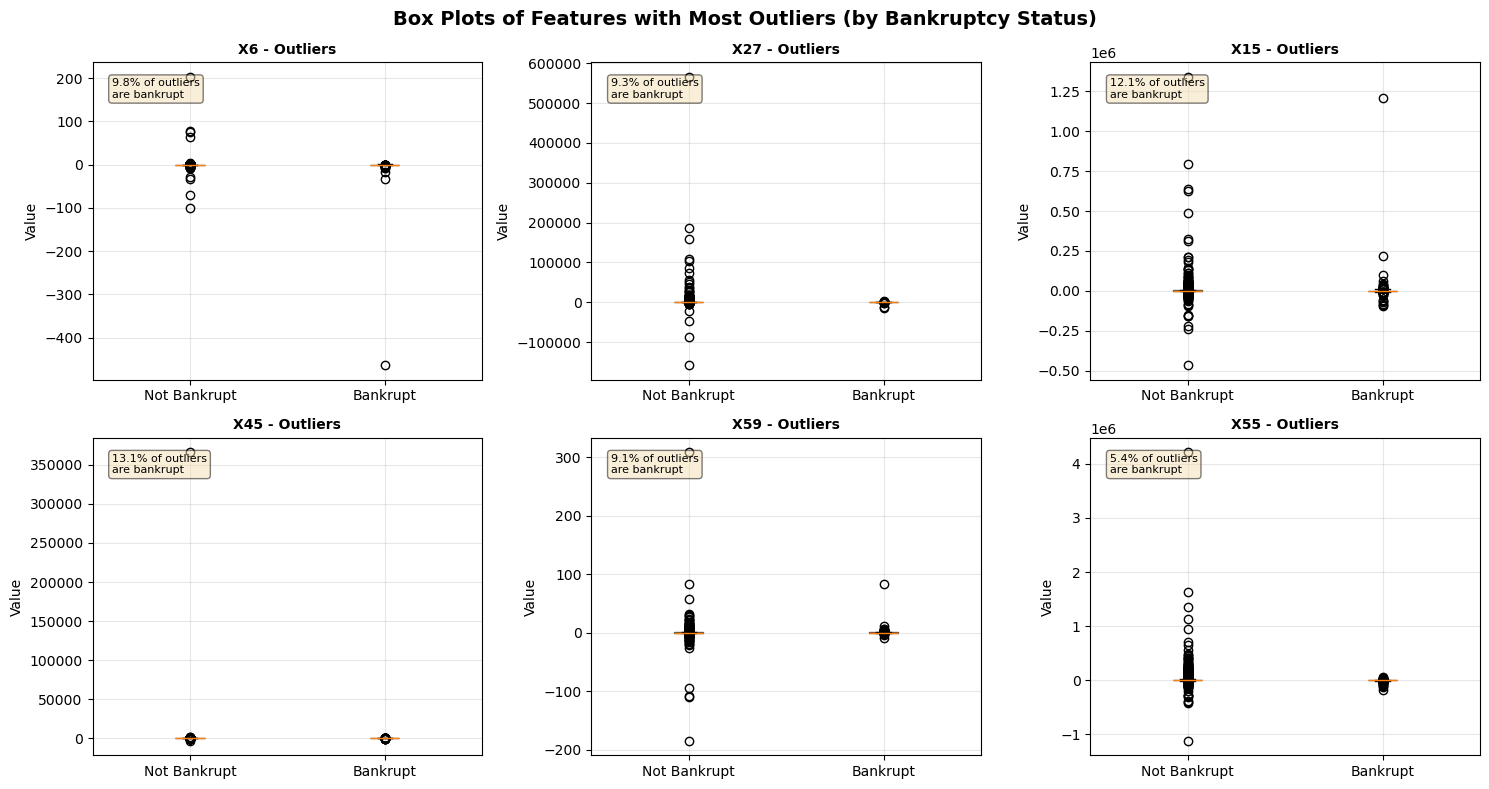

OUTLIER-BANKRUPTCY ASSOCIATION

Top 10 Features by % of Outliers that are Bankrupt:
Feature  Outlier Count  % Outliers that are Bankrupt  % Bankrupt that are Outliers
    X10            132                     39.393939                     16.883117
     X2            127                     39.370079                     16.233766
    X38            154                     37.012987                     18.506494
     X3            145                     36.551724                     17.207792
    X51            157                     35.031847                     17.857143
    X25            169                     31.360947                     17.207792
    X35            418                     23.205742                     31.493506
    X42            414                     22.946860                     30.844156
    X22            357                     22.408964                     25.974026
    X62            354                     21.751412                     25.000000


In [17]:
outlier_summary = []
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    outlier_pct = (outliers / len(data)) * 100
    
    if outliers > 0:
        # Calculate outliers by bankruptcy status
        outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
        outliers_bankrupt = (outlier_mask & (data['Bankrupt'] == 1)).sum()
        outliers_non_bankrupt = (outlier_mask & (data['Bankrupt'] == 0)).sum()
        
        # Percentage of outliers that are bankrupt
        pct_outliers_bankrupt = (outliers_bankrupt / outliers * 100) if outliers > 0 else 0
        
        # Percentage of bankrupt/non-bankrupt samples that are outliers
        total_bankrupt = (data['Bankrupt'] == 1).sum()
        total_non_bankrupt = (data['Bankrupt'] == 0).sum()
        
        pct_bankrupt_are_outliers = (outliers_bankrupt / total_bankrupt * 100) if total_bankrupt > 0 else 0
        pct_non_bankrupt_are_outliers = (outliers_non_bankrupt / total_non_bankrupt * 100) if total_non_bankrupt > 0 else 0
        
        outlier_summary.append({
            'Feature': col,
            'Outlier Count': outliers,
            'Outlier %': outlier_pct,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outliers_Bankrupt': outliers_bankrupt,
            'Outliers_NonBankrupt': outliers_non_bankrupt,
            '% Outliers that are Bankrupt': pct_outliers_bankrupt,
            '% Bankrupt that are Outliers': pct_bankrupt_are_outliers,
            '% NonBankrupt that are Outliers': pct_non_bankrupt_are_outliers
        })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier %', ascending=False)
print(f"\nTop 10 Features with Most Outliers:")
print(outlier_df.head(10))

# Visualize outliers for top features (modified to show bankruptcy status)
top_outlier_features = outlier_df.head(6)['Feature'].tolist()
_=plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_features):
    _=plt.subplot(2, 3, i+1)
    
    # Separate bankrupt and non-bankrupt
    bankrupt_data = data[data['Bankrupt'] == 1][col].dropna()
    non_bankrupt_data = data[data['Bankrupt'] == 0][col].dropna()
    
    # Box plot
    box_data = [non_bankrupt_data, bankrupt_data]
    bp = plt.boxplot(box_data, labels=['Not Bankrupt', 'Bankrupt'], 
                     patch_artist=True, vert=True)
    
    # Color the boxes
    _=bp['boxes'][0].set_facecolor('green')
    _=bp['boxes'][0].set_alpha(0.6)
    _=bp['boxes'][1].set_facecolor('red')
    _=bp['boxes'][1].set_alpha(0.6)
    
    _=plt.title(f'{col} - Outliers', fontsize=10, fontweight='bold')
    _=plt.ylabel('Value')
    _=plt.grid(alpha=0.3)
    
    # Add text with outlier percentages
    row = outlier_df[outlier_df['Feature'] == col].iloc[0]
    text = f"{row['% Outliers that are Bankrupt']:.1f}% of outliers\nare bankrupt"
    _=plt.text(0.05, 0.95, text, transform=plt.gca().transAxes,
            fontsize=8, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

_=plt.suptitle('Box Plots of Features with Most Outliers (by Bankruptcy Status)', 
            fontsize=14, fontweight='bold')
_=plt.tight_layout()
plt.show()

# NEW: Print bankruptcy association statistics
print("OUTLIER-BANKRUPTCY ASSOCIATION")
print("\nTop 10 Features by % of Outliers that are Bankrupt:")
print(outlier_df.nlargest(10, '% Outliers that are Bankrupt')[
    ['Feature', 'Outlier Count', '% Outliers that are Bankrupt', 
     '% Bankrupt that are Outliers']
].to_string(index=False))


It seems that the outliers are significant enough to not be ignored.  
There are many features with a high number of outliers.  
Also, there are many features where the outliers are highly related to bankrupcy.  
Based on this information, I do not think it is a good idea to winsorize or simply remove the ouliers.  
Using features where the outliers are highly related to bankrupcy may be a good idea.

Lets see if the outliers associated with bankrupcy and non bankrupcy is the same for the features with highest % of outliers that are bankrupt.

Plotting 8 features: ['X10', 'X2', 'X38', 'X3', 'X51', 'X25', 'X35', 'X42']
  Bankrupt: 308 samples
  Non-bankrupt: 4510 samples


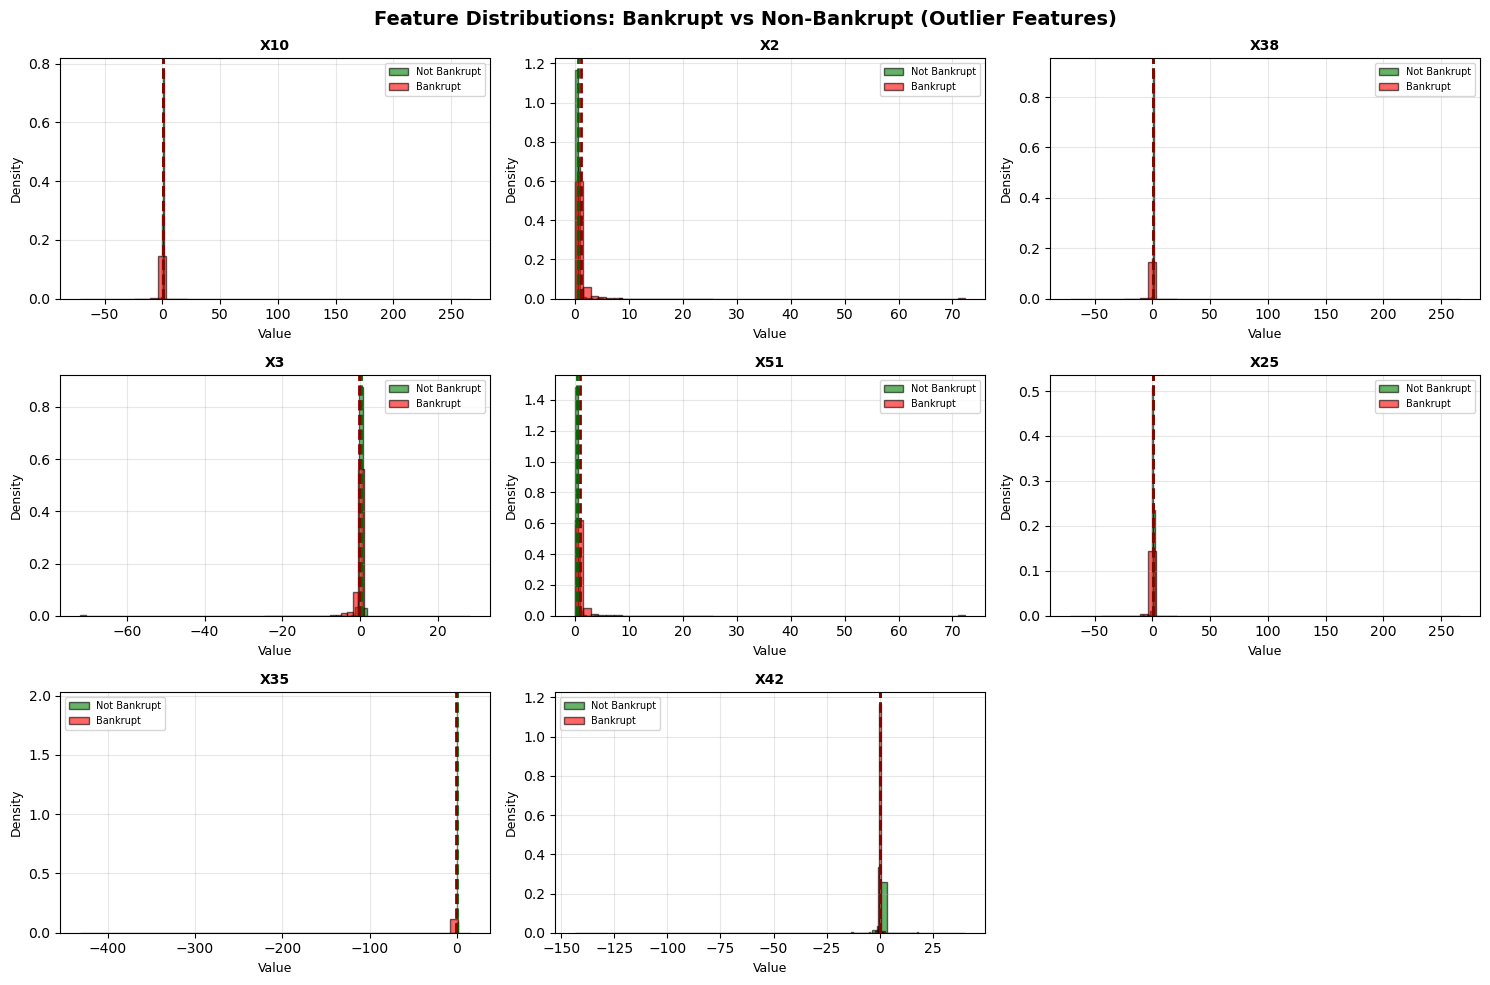

In [18]:
helper.plot_feature_distributions_by_bankruptcy(data)

The distributions seem mostly the same and we see some outliers represented as the red histogram bars near the mean of 0.  
Lets look at the given featuers and its correlation with the target and how each features are correlated with other features.

<Figure size 1200x600 with 0 Axes>

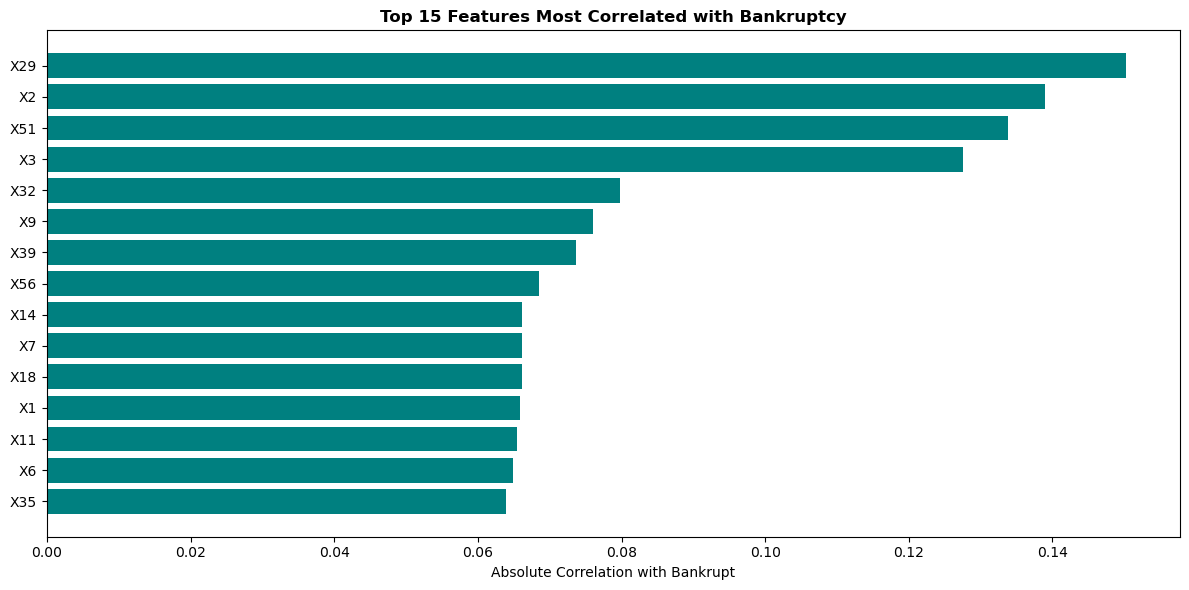


Correlation matrix shape: (65, 65)

Highly correlated pairs (|r| > 0.95): 86
  X1 - X7: 1.0000
  X1 - X11: 1.0000
  X1 - X14: 1.0000
  X1 - X18: 0.9930
  X1 - X22: 0.9973
  X1 - X35: 0.9971
  X1 - X36: -0.9828
  X1 - X48: 0.9967
  X2 - X51: 0.9773
  X4 - X16: 0.9846


In [19]:
# Calculate correlation with target
correlations = data[numeric_cols].corrwith(data['Bankrupt']).abs().sort_values(ascending=False)

# Visualize top correlations
plt.figure(figsize=(12, 6))
top_corr_features = correlations.head(15)
_=plt.barh(range(len(top_corr_features)), top_corr_features.values, color='teal')
_=plt.yticks(range(len(top_corr_features)), top_corr_features.index)
_=plt.xlabel('Absolute Correlation with Bankrupt')
_=plt.title('Top 15 Features Most Correlated with Bankruptcy', fontsize=12, fontweight='bold')
_=plt.gca().invert_yaxis()
_=plt.tight_layout()
plt.show()

# Get full correlation matrix (for numerical columns only)

corr_matrix = data.corr()
print("\nCorrelation matrix shape:", corr_matrix.shape)

def find_high_correlations(corr_matrix, threshold=0.95):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))
    return high_corr_pairs

high_corr = find_high_correlations(corr_matrix)
print(f"\nHighly correlated pairs (|r| > 0.95): {len(high_corr)}")
for pair in high_corr[:10]:  # Show first 10
    print(f"  {pair[0]} - {pair[1]}: {pair[2]:.4f}")

The given features each have a low correlation with the target and there is a large amount of highly correlated feature pairs.  
This suggests that there may be some non linear relationships for predicting bankrupcy. 

This also gives some insight into how we should impute the data.  
There are many interrelated features, shown by the list of highly correlated pairs.  
Form the previous parts of the Exploratory Data Analysis, we saw that many features have missing values ranging from 40%, 7%-4%, and 2% or less.  
It might be a reasonable idea to use a iterative imputation in conjuction with models that can caputre the non linear relationship, such as decision tree or random forest, for filling in the missing data.

# Prepare Data & Feature Engineering

With the amount of extreme outliers, and some features with very high or moderate percentage of missing values some imputation on to the training data should be done.  
**Feature X37 with over 40% should be dropped.**  No amount of imputation can make this feature usable.  
**Features with around 4-7% missing values will use iterative imputer** with random forest since random forest does not need scaling and uses an emseble, which should give a better imputation result.  
Since iterative imputer models each feature with missing values as a function of other features, our data with a high amount of correlated pairs may benefit from iterative imputation.  
4-7% missing values is stil somewhat significant and may be worth the computational time.

**Features with less than 4% missing values will use median simple imputation.**  
Since only 3 features have 4-7% missing values and there are many features having less than 4% missing value, the trade off between computational time and imputation accuracy should be fine.  
Because detecting bankrupcy is crucial and we have showed taht outliers are significant, the mean will be used.

The specific code for the imputation is in the helper function.

In [20]:
# The impute_bankruptcy_data drops the X37 feature!

data_imputation = helper.impute_bankruptcy_data(data)
data_imputation.head()


Total features: 64

Step 1: Dropping features with >40.0% missing
  Dropping 1 features:
    - X37: 42.9% missing

Step 2: Categorizing features by missing percentage
  Low missing (<4%): 44 features
  High missing (4-40.0%): 3 features

Step 3: Simple median imputation for 44 features
  Imputed 44 features
[IterativeImputer] Completing matrix with shape (4818, 63)
[IterativeImputer] Change: 761846.8886522236, scaled tolerance: 4818.7 
[IterativeImputer] Change: 3454.822341668848, scaled tolerance: 4818.7 
[IterativeImputer] Early stopping criterion reached.
Iterative imputation complete

Validation: 0 missing values remain

Imputation complete!


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
0,0.025417,0.417690,0.05680,1.1605,-126.390,0.413550,0.025417,1.23950,1.16500,0.51773,...,0.141650,0.049094,0.85835,0.123220,5.6167,7.4042,164.310,2.2214,1.3340,0
1,-0.023834,0.210100,0.50839,4.2374,22.034,0.058412,-0.027621,3.65790,0.98183,0.76855,...,-0.018502,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.8020,6.4782,0
2,0.030515,0.446060,0.19569,1.5650,35.766,0.281960,0.039264,0.88456,1.05260,0.39457,...,0.049940,0.077337,0.95006,0.252660,15.0490,2.8179,104.730,3.4852,2.6361,0
3,0.052318,0.056366,0.54562,10.6800,438.200,0.136490,0.058164,10.85300,1.02790,0.61173,...,0.027178,0.085524,0.97282,0.000000,6.0157,7.4626,48.756,7.4863,1.0602,0
4,0.000992,0.497120,0.12316,1.3036,-71.398,0.000000,0.001007,1.01160,1.29210,0.50288,...,-0.020100,0.001974,0.99925,0.019736,3.4819,8.5820,114.580,3.1854,2.7420,0


All seems good after the imputation.  
Lets see if the distribution changed or not.

Text(0.5, 1.0, 'FEATURE DISTRIBUTIONS AFTER IMPUTATION')

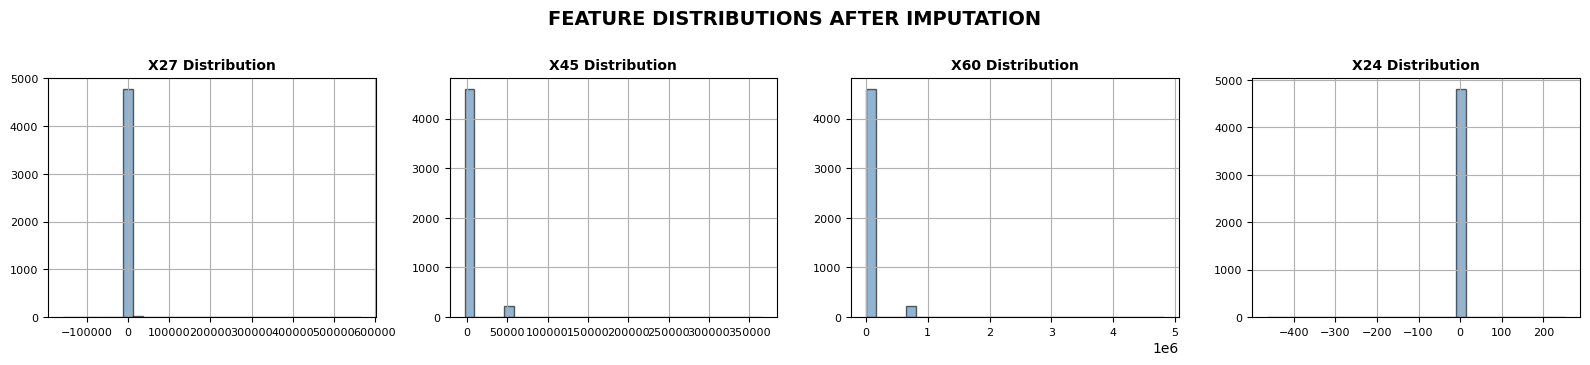

Text(0.5, 1.0, 'FEATURE DISTRIBUTIONS BEFORE IMPUTATION')

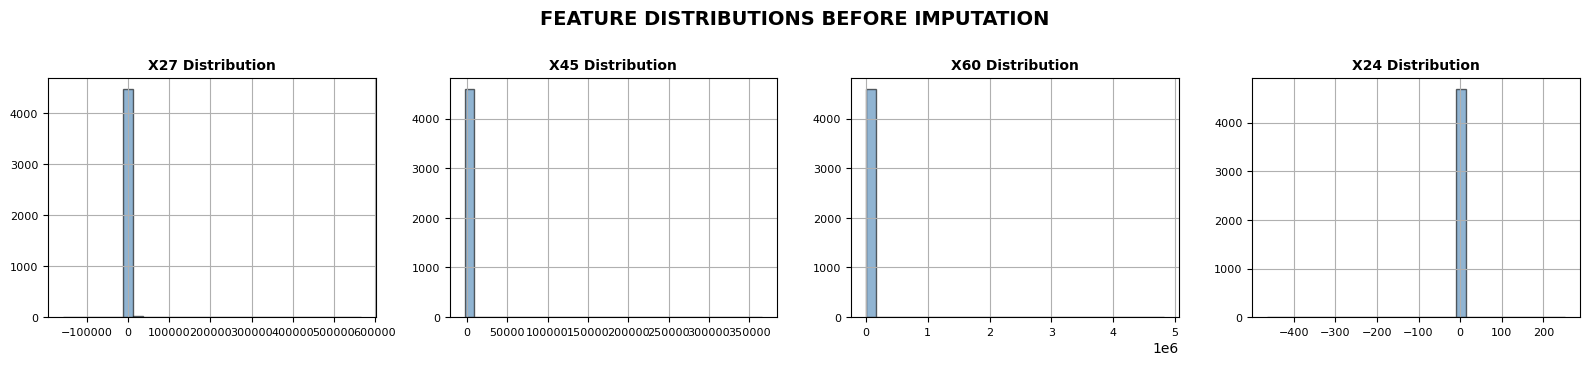

In [21]:
# Plot top_4 features with highest missing value percentage
top_5_features_missing = ['X27', 'X45', 'X60', 'X24']
_=plt.figure(figsize=(16, 12))

for i, col in enumerate(data_imputation[top_5_features_missing]):
    _=plt.subplot(4, 4, i+1)
    
    # Histogram with KDE
    _=data_imputation[col].hist(bins=30, alpha=0.6, color='steelblue', edgecolor='black')
    _=plt.title(f'{col} Distribution', fontsize=10, fontweight='bold')
    _=plt.xlabel('')
    _= plt.ylabel('')
    _=plt.tick_params(labelsize=8)
    
plt.suptitle('FEATURE DISTRIBUTIONS AFTER IMPUTATION', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()
#try plotting only the iqrs

_=plt.figure(figsize=(16, 12))

for i, col in enumerate(data[top_5_features_missing]):
    _=plt.subplot(4, 4, i+1)
    
    # Histogram with KDE
    _=data[col].hist(bins=30, alpha=0.6, color='steelblue', edgecolor='black')
    _=plt.title(f'{col} Distribution', fontsize=10, fontweight='bold')
    _=plt.xlabel('')
    _= plt.ylabel('')
    _=plt.tick_params(labelsize=8)
    
plt.suptitle('FEATURE DISTRIBUTIONS BEFORE IMPUTATION', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

It seems that the distributions had a minimal change. Feature X45 and X60 each had its 220 data missing imputed (over 4%), which is reflected by a small bar at around 50000 and 0.8 in the x axis respectively.  
Interestingly, X27, which has over 6% of missing data but is distribution before and after imputation looks bascially identical.  
Feature X24, which used a median imputation also seems to be unchanged.  
Therefore, the imputation applied to the features with missing values does not seem to change the distribution much and is appropriately used.  

The features in the data set are all ratios that have been divided with a absolute vlaue such as total assets.   
This means that the features are already normalized.  
However, for models that are sensitive to scale, standardization may be more suitable.  

### Altman Z score
While searching about predicting financial bankrupcy, there seems to be something called the **Altman Z-score** which has been used to calculate the probaiblity of bankrupcy.  
Z = 1.2*X1 + 1.4*X2 + 3.3*X3 + 0.6*X4 + 1.0*X5 (This is the formula where X is a specific ratio).  
Given the abundance of ratios as the features in our given dataset, we should be able to calculate the Z score .  
Using the given features in the data set, we will try to incorporate the Altman Z-score and see how useful this new feature can be.  
The detailed code for this is in the helper function.

In [22]:
altman_data = helper.calculate_altman_z_score(data_imputation)

  Formula: Z = 1.2*X3 + 1.4*X6 + 3.3*X7 + 0.6*X8 + 1.0*X9
ALTMAN Z-SCORE SUMMARY

Z-Score Distribution:
  Mean:   5.0117
  Median: 2.9494
  Std:    73.0765
  Min:    -2175.9674
  Max:    4124.5947
  25%:    1.8427
  75%:    4.5900

Z-Score Zones:
  Distress  :  1162 ( 24.1%)
  Grey      :  1293 ( 26.8%)
  Safe      :  2363 ( 49.0%)
BANKRUPTCY ANALYSIS

Z-Score by Bankruptcy Status:
  Non-Bankrupt   : Mean= 5.785, Median= 3.026, Std=68.074
  Bankrupt       : Mean=-6.305, Median= 1.464, Std=124.861

Bankruptcy Rate by Z-Score Zone:
  Distress  :  180/1162 bankrupt ( 15.5%)
  Grey      :   54/1293 bankrupt (  4.2%)
  Safe      :   74/2363 bankrupt (  3.1%)
Predictive power

Distress Zone (Z < 1.81) Analysis:
  Companies in distress: 1162
  Bankrupt companies in distress: 180
  Precision: 15.5% (of distress predictions are correct)
  Recall: 58.4% (of bankruptcies caught by distress flag)

Safe Zone (Z > 2.99) Analysis:
  Companies in safe zone: 2363
  Bankrupt companies in safe zone: 74
 

The Z score shows that around 15.5% may be in distress.   
Based on the fact that there are around 7% of the data as bankrupt companies, the Z score seems to alert potential bankrupcy reasonably well and could be a helpful feature in predicting bankrupcy.  
Once we have chosen a model, we will see if the model performs better with or without the Altman Z-score and determine if this feature will be used or not.

# Selecting Models

We will now start exploring various models and determine which model will be best suited.  
First of all, we will use a base line model, naive bayes, as a reference.  
We will also use Gaussian Naive Bays because the features of the data given are normalized.  
We will use Naive Bayes, Logistic Regression, Decision Tree, Random Forest, and XGBoost for the model comparison.  
**The train test split will use 20% as test. SInce the holdout data contains around 1090 examples and we have 4818 examples, 20% of the given data set should give close to a 1000.**

Since we were told that we can assume that it is 5 times worse to *fail to identify a company that will go bankrupt*, we will have a custom class weight.  
Non bankrupcy will have a weight of 1 and bankrupcy a weight of 5.

We want to emphasize the recall score because we also want to focus on false negatives (predicting a company will not go bankrupt when they actually will go bankrupt)

**Lets compare how other models such as logistic regression, decision tree, random forest, and XGBoost will compare with the baseline naive bayes model.**

Note:  
The parameters for the models were mostly set as default, except for a few.  
For the decision tree and random forest, the depth was set to 10 (log_2(4818) is roughly 10 where 4818 is the number of samples).  
It seems that the rule of thumb for setting the hyperparameter for the depth of the tree is to use the log to prevent over fitting and balance complexity and generalization.  
Also, the weights were assigned to the variable custom weights as the default value was 13, but we want it to be 5.

XGBoost seems to be interesting, as it uses sequential gradient boosting approach where each new tree corrects the errors of the previous onesand using an ensemble of decision trees.  
The subsample, which is fraction of the training samples used to train a tree, will be set to 0.8, equal to the train test split ratio to replicate the train and test size ratio.  
Since ensembles can be powerful than simply one model, combining that with error correction of the trees, XGBoost could be a strong contender.  
The scale_pos weight, is also set to 5 due to the reason explain in the previous paragraph. 

Naive Bayes


,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,priors,None
,var_smoothing,1e-09



Test Set Metrics:
  Accuracy:  0.9305
  Precision: 0.3684  (Of predicted bankrupt, what % are actually bankrupt)
  Recall:    0.1129  (Of actual bankrupt, what % did we catch)
  F1-Score:  0.1728  (Harmonic mean of precision & recall)
  ROC-AUC:   0.7754
  PR-AUC:    0.2417

Cross-Validation (5-fold):
  AUC:       0.7246 (+/- 0.1201)
  Precision: 0.2575 (+/- 0.1258)
  Recall:    0.0936 (+/- 0.0714)

Confusion Matrix:
                 Predicted
                 Not B.  Bankrupt
Actual Not B.      890      12
Actual Bankrupt     55       7

Classification Report:
              precision    recall  f1-score   support

Not Bankrupt       0.94      0.99      0.96       902
    Bankrupt       0.37      0.11      0.17        62

    accuracy                           0.93       964
   macro avg       0.66      0.55      0.57       964
weighted avg       0.90      0.93      0.91       964

Logistic Regression


,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0



Test Set Metrics:
  Accuracy:  0.9232
  Precision: 0.3966  (Of predicted bankrupt, what % are actually bankrupt)
  Recall:    0.3710  (Of actual bankrupt, what % did we catch)
  F1-Score:  0.3833  (Harmonic mean of precision & recall)
  ROC-AUC:   0.8325
  PR-AUC:    0.2910

Cross-Validation (5-fold):
  AUC:       0.7874 (+/- 0.0724)
  Precision: 0.4109 (+/- 0.1334)
  Recall:    0.3700 (+/- 0.0995)

Confusion Matrix:
                 Predicted
                 Not B.  Bankrupt
Actual Not B.      867      35
Actual Bankrupt     39      23

Classification Report:
              precision    recall  f1-score   support

Not Bankrupt       0.96      0.96      0.96       902
    Bankrupt       0.40      0.37      0.38        62

    accuracy                           0.92       964
   macro avg       0.68      0.67      0.67       964
weighted avg       0.92      0.92      0.92       964

Decision Tree


,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,"{0: 1, 1: 5}"



Test Set Metrics:
  Accuracy:  0.9409
  Precision: 0.5397  (Of predicted bankrupt, what % are actually bankrupt)
  Recall:    0.5484  (Of actual bankrupt, what % did we catch)
  F1-Score:  0.5440  (Harmonic mean of precision & recall)
  ROC-AUC:   0.7276
  PR-AUC:    0.4150

Cross-Validation (5-fold):
  AUC:       0.6855 (+/- 0.1404)
  Precision: 0.4782 (+/- 0.1418)
  Recall:    0.4759 (+/- 0.1862)

Confusion Matrix:
                 Predicted
                 Not B.  Bankrupt
Actual Not B.      873      29
Actual Bankrupt     28      34

Classification Report:
              precision    recall  f1-score   support

Not Bankrupt       0.97      0.97      0.97       902
    Bankrupt       0.54      0.55      0.54        62

    accuracy                           0.94       964
   macro avg       0.75      0.76      0.76       964
weighted avg       0.94      0.94      0.94       964

Random Forest


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



Test Set Metrics:
  Accuracy:  0.9471
  Precision: 0.6897  (Of predicted bankrupt, what % are actually bankrupt)
  Recall:    0.3226  (Of actual bankrupt, what % did we catch)
  F1-Score:  0.4396  (Harmonic mean of precision & recall)
  ROC-AUC:   0.9012
  PR-AUC:    0.5381

Cross-Validation (5-fold):
  AUC:       0.9128 (+/- 0.0306)
  Precision: 0.5865 (+/- 0.3284)
  Recall:    0.1990 (+/- 0.0725)

Confusion Matrix:
                 Predicted
                 Not B.  Bankrupt
Actual Not B.      893       9
Actual Bankrupt     42      20

Classification Report:
              precision    recall  f1-score   support

Not Bankrupt       0.96      0.99      0.97       902
    Bankrupt       0.69      0.32      0.44        62

    accuracy                           0.95       964
   macro avg       0.82      0.66      0.71       964
weighted avg       0.94      0.95      0.94       964

XGBoost


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'



Test Set Metrics:
  Accuracy:  0.9627
  Precision: 0.7826  (Of predicted bankrupt, what % are actually bankrupt)
  Recall:    0.5806  (Of actual bankrupt, what % did we catch)
  F1-Score:  0.6667  (Harmonic mean of precision & recall)
  ROC-AUC:   0.9449
  PR-AUC:    0.7496

Cross-Validation (5-fold):
  AUC:       nan (+/- nan)
  Precision: 0.7959 (+/- 0.1669)
  Recall:    0.4722 (+/- 0.0410)

Confusion Matrix:
                 Predicted
                 Not B.  Bankrupt
Actual Not B.      892      10
Actual Bankrupt     26      36

Classification Report:
              precision    recall  f1-score   support

Not Bankrupt       0.97      0.99      0.98       902
    Bankrupt       0.78      0.58      0.67        62

    accuracy                           0.96       964
   macro avg       0.88      0.78      0.82       964
weighted avg       0.96      0.96      0.96       964

SUMMARY TABLE - ALL MODELS
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC   PR-AUC
     

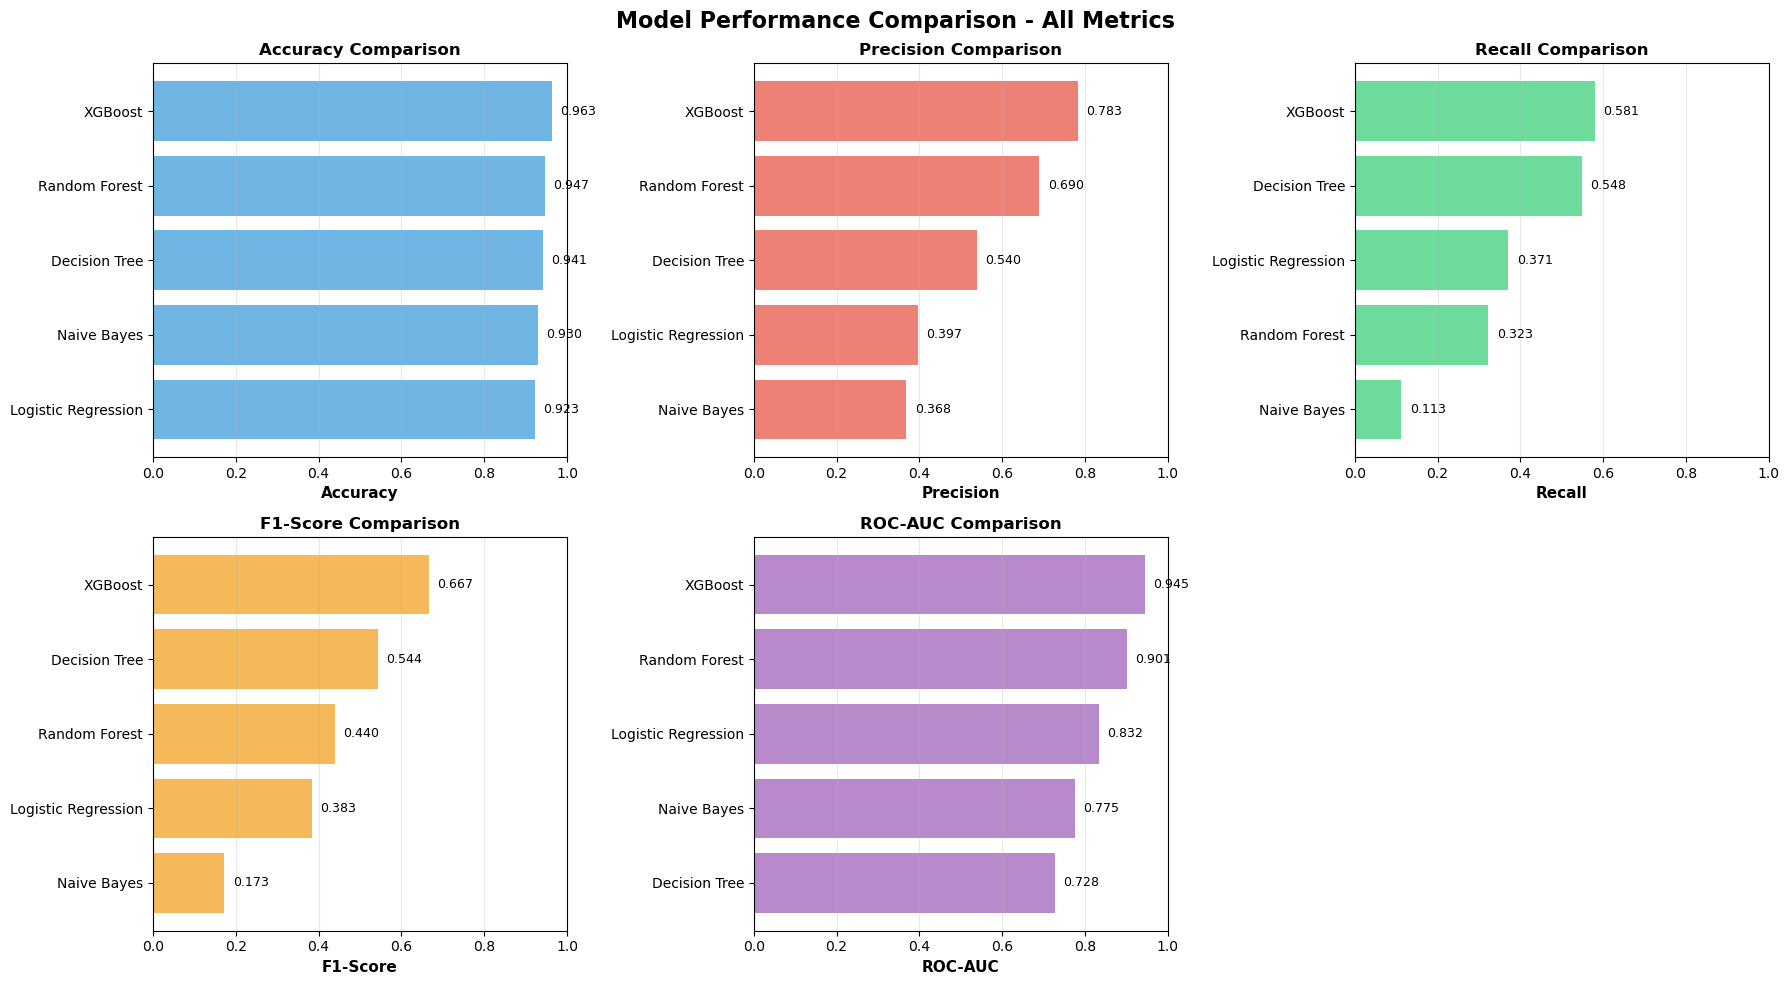

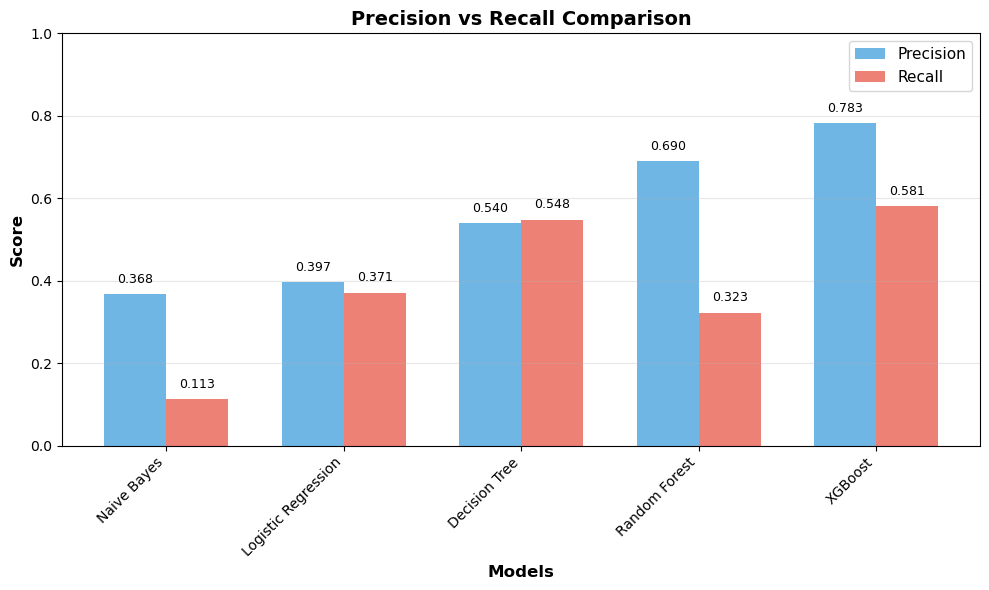

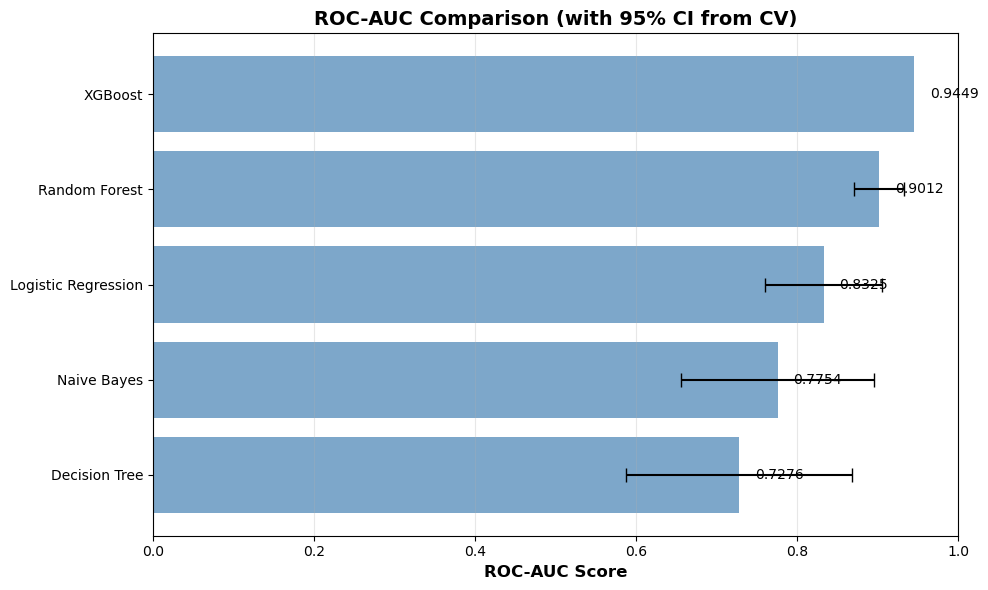

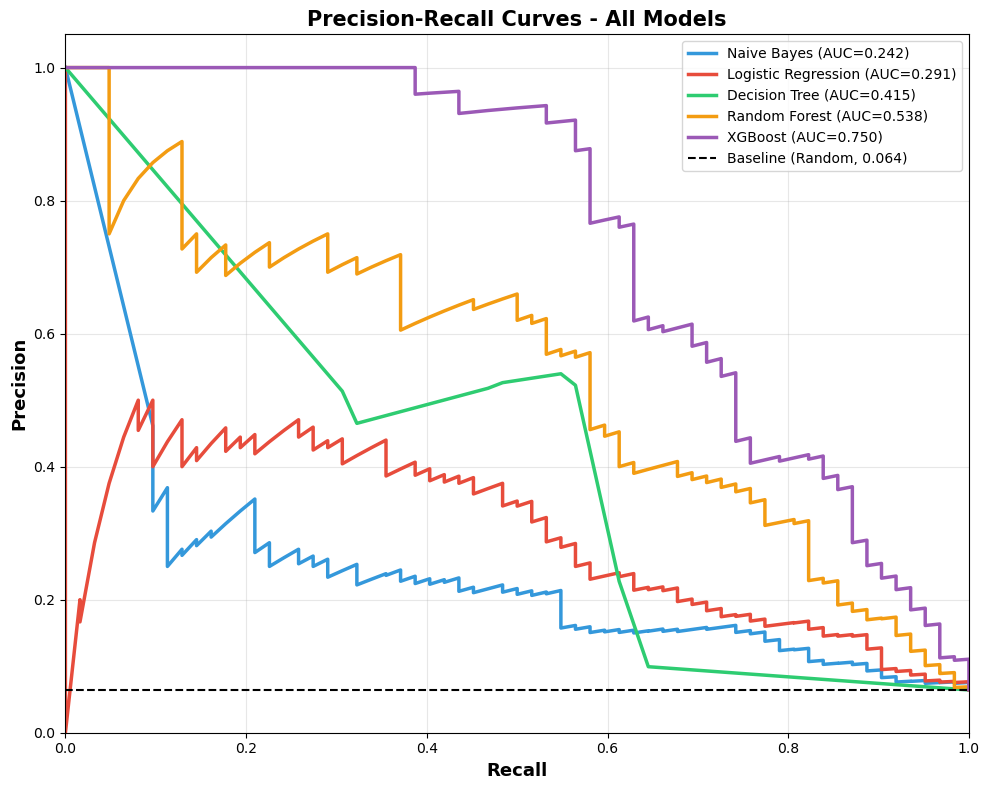

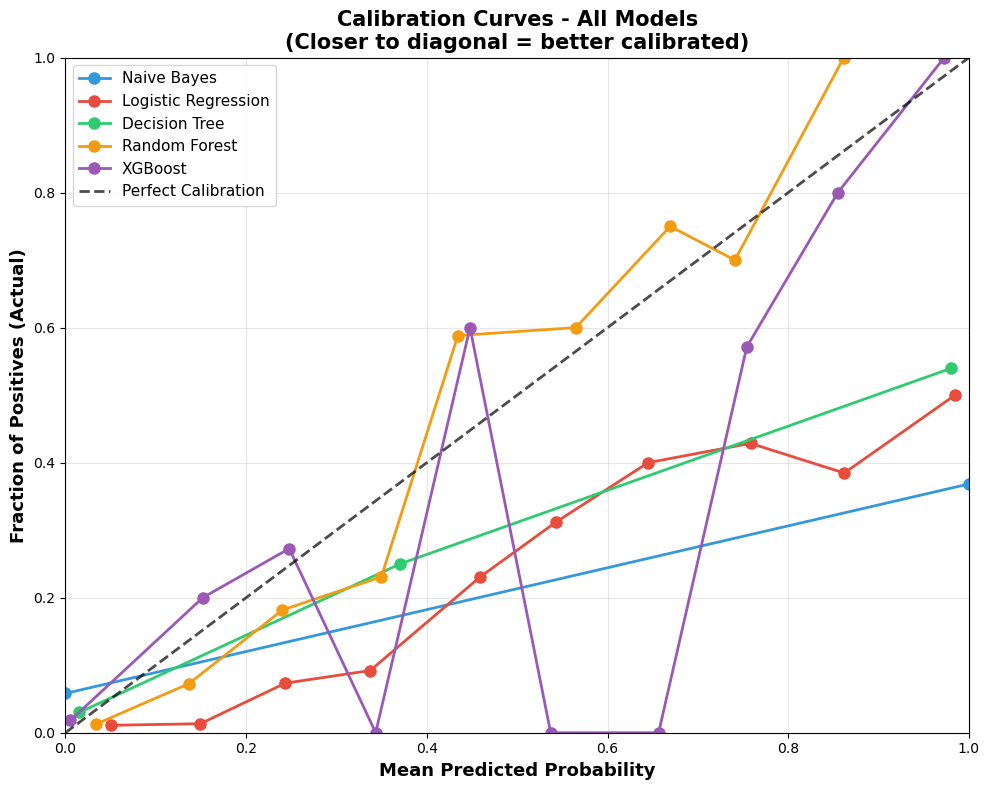

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report, 
                             confusion_matrix, precision_recall_curve, auc)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create custom weight for parameter
custom_weights = {0: 1, 1: 5}

# Prepare data
X = data_imputation.drop(columns=['Bankrupt'])
y = data_imputation['Bankrupt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define baseline models
models = {
    'Naive Bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ]),
    
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(
            max_iter=1000, 
            class_weight=custom_weights,
            random_state=42
        ))
    ]),
    
    'Decision Tree': DecisionTreeClassifier(
        max_depth=10,
        class_weight=custom_weights,
        random_state=42
    ),
    
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        class_weight=custom_weights,
        random_state=42,
        n_jobs=-1
    ),
    
    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=5.0,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1
    )
}

# Train and evaluate all models
results = []
pr_curve_data = {}  # Store precision-recall curve data for plotting


for name, model in models.items():
    print(f"{name}")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision-recall curve
    precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    
    # Store PR curve data
    pr_curve_data[name] = {
        'precision': precision_curve,
        'recall': recall_curve,
        'pr_auc': pr_auc
    }
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation scores
    cv_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision', n_jobs=-1)
    cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc,
        'CV_AUC_Mean': cv_auc.mean(),
        'CV_AUC_Std': cv_auc.std(),
        'CV_Precision_Mean': cv_precision.mean(),
        'CV_Recall_Mean': cv_recall.mean()
    })
    
    # Print detailed metrics
    print(f"\nTest Set Metrics:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}  (Of predicted bankrupt, what % are actually bankrupt)")
    print(f"  Recall:    {recall:.4f}  (Of actual bankrupt, what % did we catch)")
    print(f"  F1-Score:  {f1:.4f}  (Harmonic mean of precision & recall)")
    print(f"  ROC-AUC:   {roc_auc:.4f}")
    print(f"  PR-AUC:    {pr_auc:.4f}")
    
    print(f"\nCross-Validation (5-fold):")
    print(f"  AUC:       {cv_auc.mean():.4f} (+/- {cv_auc.std()*2:.4f})")
    print(f"  Precision: {cv_precision.mean():.4f} (+/- {cv_precision.std()*2:.4f})")
    print(f"  Recall:    {cv_recall.mean():.4f} (+/- {cv_recall.std()*2:.4f})")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(f"                 Predicted")
    print(f"                 Not B.  Bankrupt")
    print(f"Actual Not B.    {cm[0,0]:5d}   {cm[0,1]:5d}")
    print(f"Actual Bankrupt  {cm[1,0]:5d}   {cm[1,1]:5d}")
    
    # Classification report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Bankrupt', 'Bankrupt']))

# Create summary DataFrame
results_df = pd.DataFrame(results)


print("SUMMARY TABLE - ALL MODELS")
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC']].to_string(index=False))


print("CROSS-VALIDATION SUMMARY")
print(results_df[['Model', 'CV_AUC_Mean', 'CV_Precision_Mean', 'CV_Recall_Mean']].to_string(index=False))

# Sort by different metrics

print("BEST MODELS BY METRIC")
print(f"\nBest Accuracy:  {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']} "
      f"({results_df['Accuracy'].max():.4f})")
print(f"Best Precision: {results_df.loc[results_df['Precision'].idxmax(), 'Model']} "
      f"({results_df['Precision'].max():.4f})")
print(f"Best Recall:    {results_df.loc[results_df['Recall'].idxmax(), 'Model']} "
      f"({results_df['Recall'].max():.4f})")
print(f"Best F1-Score:  {results_df.loc[results_df['F1-Score'].idxmax(), 'Model']} "
      f"({results_df['F1-Score'].max():.4f})")
print(f"Best ROC-AUC:   {results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']} "
      f"({results_df['ROC-AUC'].max():.4f})")
print(f"Best PR-AUC:    {results_df.loc[results_df['PR-AUC'].idxmax(), 'Model']} "
      f"({results_df['PR-AUC'].max():.4f})")

# Visualizations

# Plot 1: Multiple metrics comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    sorted_df = results_df.sort_values(metric, ascending=True)
    
    bars = ax.barh(sorted_df['Model'], sorted_df[metric], color=colors[idx], alpha=0.7)
    _=ax.set_xlabel(metric, fontsize=11, fontweight='bold')
    _=ax.set_xlim(0, 1)
    _=ax.grid(axis='x', alpha=0.3)
    _=ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    
    # Add value labels
    for i, (model, value) in enumerate(zip(sorted_df['Model'], sorted_df[metric])):
        _=ax.text(value + 0.02, i, f'{value:.3f}', va='center', fontsize=9)

# Hide the 6th subplot
_=axes[1, 2].axis('off')

_=plt.suptitle('Model Performance Comparison - All Metrics', fontsize=16, fontweight='bold')
_=plt.tight_layout()
_=plt.show()

# Plot 2: Precision-Recall tradeoff
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(results_df))
width = 0.35

bars1 = ax.bar(x - width/2, results_df['Precision'], width, 
               label='Precision', color='#3498db', alpha=0.7)
bars2 = ax.bar(x + width/2, results_df['Recall'], width, 
               label='Recall', color='#e74c3c', alpha=0.7)

_=ax.set_xlabel('Models', fontsize=12, fontweight='bold')
_=ax.set_ylabel('Score', fontsize=12, fontweight='bold')
_=ax.set_title('Precision vs Recall Comparison', fontsize=14, fontweight='bold')
_=ax.set_xticks(x)
_=ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
_=ax.legend(fontsize=11)
_=ax.grid(axis='y', alpha=0.3)
_=ax.set_ylim(0, 1)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        _=ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

_=plt.tight_layout()
plt.show()

# Plot 3: ROC-AUC with error bars
fig, ax = plt.subplots(figsize=(10, 6))

sorted_df = results_df.sort_values('ROC-AUC', ascending=True)

bars = ax.barh(sorted_df['Model'], sorted_df['ROC-AUC'], 
               xerr=sorted_df['CV_AUC_Std']*2, 
               color='steelblue', alpha=0.7, capsize=5)

_=ax.set_xlabel('ROC-AUC Score', fontsize=12, fontweight='bold')
_=ax.set_title('ROC-AUC Comparison (with 95% CI from CV)', fontsize=14, fontweight='bold')
_=ax.set_xlim(0, 1)
_=ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (model, auc) in enumerate(zip(sorted_df['Model'], sorted_df['ROC-AUC'])):
    _=ax.text(auc + 0.02, i, f'{auc:.4f}', va='center', fontsize=10)

_=plt.tight_layout()
plt.show()

# Plot 4: Precision-Recall Curves for all models
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for each model
model_colors = {
    'Naive Bayes': '#3498db',
    'Logistic Regression': '#e74c3c',
    'Decision Tree': '#2ecc71',
    'Random Forest': '#f39c12',
    'XGBoost': '#9b59b6'
}

# Plot each model's PR curve
for model_name, pr_data in pr_curve_data.items():
    _=ax.plot(pr_data['recall'], pr_data['precision'], 
             linewidth=2.5,
             label=f"{model_name} (AUC={pr_data['pr_auc']:.3f})",
             color=model_colors.get(model_name, 'black'))

# Add baseline (random classifier)
baseline_precision = (y_test == 1).sum() / len(y_test)
_=ax.plot([0, 1], [baseline_precision, baseline_precision], 
         'k--', linewidth=1.5, label=f'Baseline (Random, {baseline_precision:.3f})')

_=ax.set_xlabel('Recall', fontsize=13, fontweight='bold')
_=ax.set_ylabel('Precision', fontsize=13, fontweight='bold')
_=ax.set_title('Precision-Recall Curves - All Models', fontsize=15, fontweight='bold')
_=ax.legend(fontsize=10, loc='best')
_=ax.grid(alpha=0.3)
_=ax.set_xlim([0.0, 1.0])
_=ax.set_ylim([0.0, 1.05])

_=plt.tight_layout()
plt.show()

# Plot 5: Calibration Curves for all models

from sklearn.calibration import calibration_curve

fig, ax = plt.subplots(figsize=(10, 8))

# Store calibration data and metrics
calibration_data = {}

for name, model in models.items():
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Use sklearn's calibration_curve function
    # n_bins: number of bins to discretize the [0, 1] interval
    # strategy: 'uniform' for equal-width bins, 'quantile' for equal-sample bins
    prob_true, prob_pred = calibration_curve(
        y_test, 
        y_pred_proba, 
        n_bins=10, 
        strategy='uniform'
    )
    
    # Store calibration data
    calibration_data[name] = {
        'prob_true': prob_true,
        'prob_pred': prob_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Plot calibration curve
    _=ax.plot(prob_pred, prob_true, 
             marker='o', 
             markersize=8,
             linewidth=2,
             label=name,
             color=model_colors.get(name, 'black'))

# Add perfect calibration line
_=ax.plot([0, 1], [0, 1], 
         'k--', 
         linewidth=2, 
         label='Perfect Calibration',
         alpha=0.7)

_=ax.set_xlabel('Mean Predicted Probability', fontsize=13, fontweight='bold')
_=ax.set_ylabel('Fraction of Positives (Actual)', fontsize=13, fontweight='bold')
_=ax.set_title('Calibration Curves - All Models\n(Closer to diagonal = better calibrated)', 
              fontsize=15, fontweight='bold')
_=ax.legend(fontsize=11, loc='upper left')
_=ax.grid(alpha=0.3)
_=ax.set_xlim([0.0, 1.0])
_=ax.set_ylim([0.0, 1.0])

_=plt.tight_layout()
plt.show()


We will exclude accuracy for the evaluation as the data is imbalanced.
 
XGBoost seems to consistenty be the top in all metrics.  
Something interesting is the confidence interval of the ROC-AUC score.   
Decision Tree, despite being second highest in recall and f1 score, has a significantly worse roc-auc score with a wider confidence interval than Naive Bayes.  
This suggests that decision tree may not be the most reliable model.  
Random forest, although being second in precision and ROC-AUC score and a seemingly better calibration curve compared to XGBoost, has a worse F1 score and terrible recall score.  
If we tune XGBoost a bit more, the calibration curve may become better.  
Based on these insights, XGBoost seems to be the best model to choose.  

Before we will do some error analysis, lets see if adding the Altman Z-score feature will be useful or not by applying XGBoost to the data sets with and without the new feature.  

We will use 5 fold and a train test split with 20% as the test size.  
The dataset with the z score (altman_data) will drop the z_score zone catagorical data (which is a string of either safe, grey, or distress).  
This is fine because there is a z score zone flag (z_distress_flag, z_grey_flag, z_safe_flag) which is a one hot encoding, as shown below.

In [24]:
altman_data.head()
altman_data_final = altman_data.drop('z_score_zone', axis=1)
altman_data_final.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,z4_equity_liability_ratio,z5_asset_turnover,altman_z_score,z_score_zone,z_distress_flag,z_grey_flag,z_safe_flag,z_distance_from_distress,z_distance_from_safe,z_distress_severity
0,0.025417,0.417690,0.05680,1.1605,-126.390,0.413550,0.025417,1.23950,1.16500,0.51773,...,1.23950,1.16500,2.639706,grey,0,1,0,0.829706,-0.350294,0.0
1,-0.023834,0.210100,0.50839,4.2374,22.034,0.058412,-0.027621,3.65790,0.98183,0.76855,...,3.65790,0.98183,3.777265,safe,0,0,1,1.967265,0.787265,0.0
2,0.030515,0.446060,0.19569,1.5650,35.766,0.281960,0.039264,0.88456,1.05260,0.39457,...,0.88456,1.05260,2.342479,grey,0,1,0,0.532479,-0.647521,0.0
3,0.052318,0.056366,0.54562,10.6800,438.200,0.136490,0.058164,10.85300,1.02790,0.61173,...,10.85300,1.02790,8.577471,safe,0,0,1,6.767471,5.587471,0.0
4,0.000992,0.497120,0.12316,1.3036,-71.398,0.000000,0.001007,1.01160,1.29210,0.50288,...,1.01160,1.29210,2.050175,grey,0,1,0,0.240175,-0.939825,0.0


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,z3_ebit_ratio,z4_equity_liability_ratio,z5_asset_turnover,altman_z_score,z_distress_flag,z_grey_flag,z_safe_flag,z_distance_from_distress,z_distance_from_safe,z_distress_severity
0,0.025417,0.417690,0.05680,1.1605,-126.390,0.413550,0.025417,1.23950,1.16500,0.51773,...,0.025417,1.23950,1.16500,2.639706,0,1,0,0.829706,-0.350294,0.0
1,-0.023834,0.210100,0.50839,4.2374,22.034,0.058412,-0.027621,3.65790,0.98183,0.76855,...,-0.027621,3.65790,0.98183,3.777265,0,0,1,1.967265,0.787265,0.0
2,0.030515,0.446060,0.19569,1.5650,35.766,0.281960,0.039264,0.88456,1.05260,0.39457,...,0.039264,0.88456,1.05260,2.342479,0,1,0,0.532479,-0.647521,0.0
3,0.052318,0.056366,0.54562,10.6800,438.200,0.136490,0.058164,10.85300,1.02790,0.61173,...,0.058164,10.85300,1.02790,8.577471,0,0,1,6.767471,5.587471,0.0
4,0.000992,0.497120,0.12316,1.3036,-71.398,0.000000,0.001007,1.01160,1.29210,0.50288,...,0.001007,1.01160,1.29210,2.050175,0,1,0,0.240175,-0.939825,0.0


The code for the comparision is in the helper function.  
It takes the data_imputation set and creates another set with the altman z score, and drops the 'z_score_zone' column

Train size: 3854
Test size: 964
COMPARISON RESULTS

   Metric  WITHOUT Z-Score  WITH Z-Score  Difference  % Improvement
 Accuracy         0.962656      0.962656    0.000000       0.000000
Precision         0.782609      0.760000   -0.022609      -2.888889
   Recall         0.580645      0.612903    0.032258       5.555556
 F1-Score         0.666667      0.678571    0.011905       1.785714
  ROC-AUC         0.944854      0.930209   -0.014645      -1.549962

Cross-Validation Recall:
  WITHOUT Z-Score: 0.4722 (+/- 0.0410)
  WITH Z-Score:    0.4683 (+/- 0.0844)
  Improvement:     -0.39%
CONFUSION MATRICES

WITHOUT Z-Score:
                 Predicted
                 Not B.  Bankrupt
Actual Not B.      892      10
Actual Bankrupt     26      36

WITH Z-Score:
                 Predicted
                 Not B.  Bankrupt
Actual Not B.      890      12
Actual Bankrupt     24      38


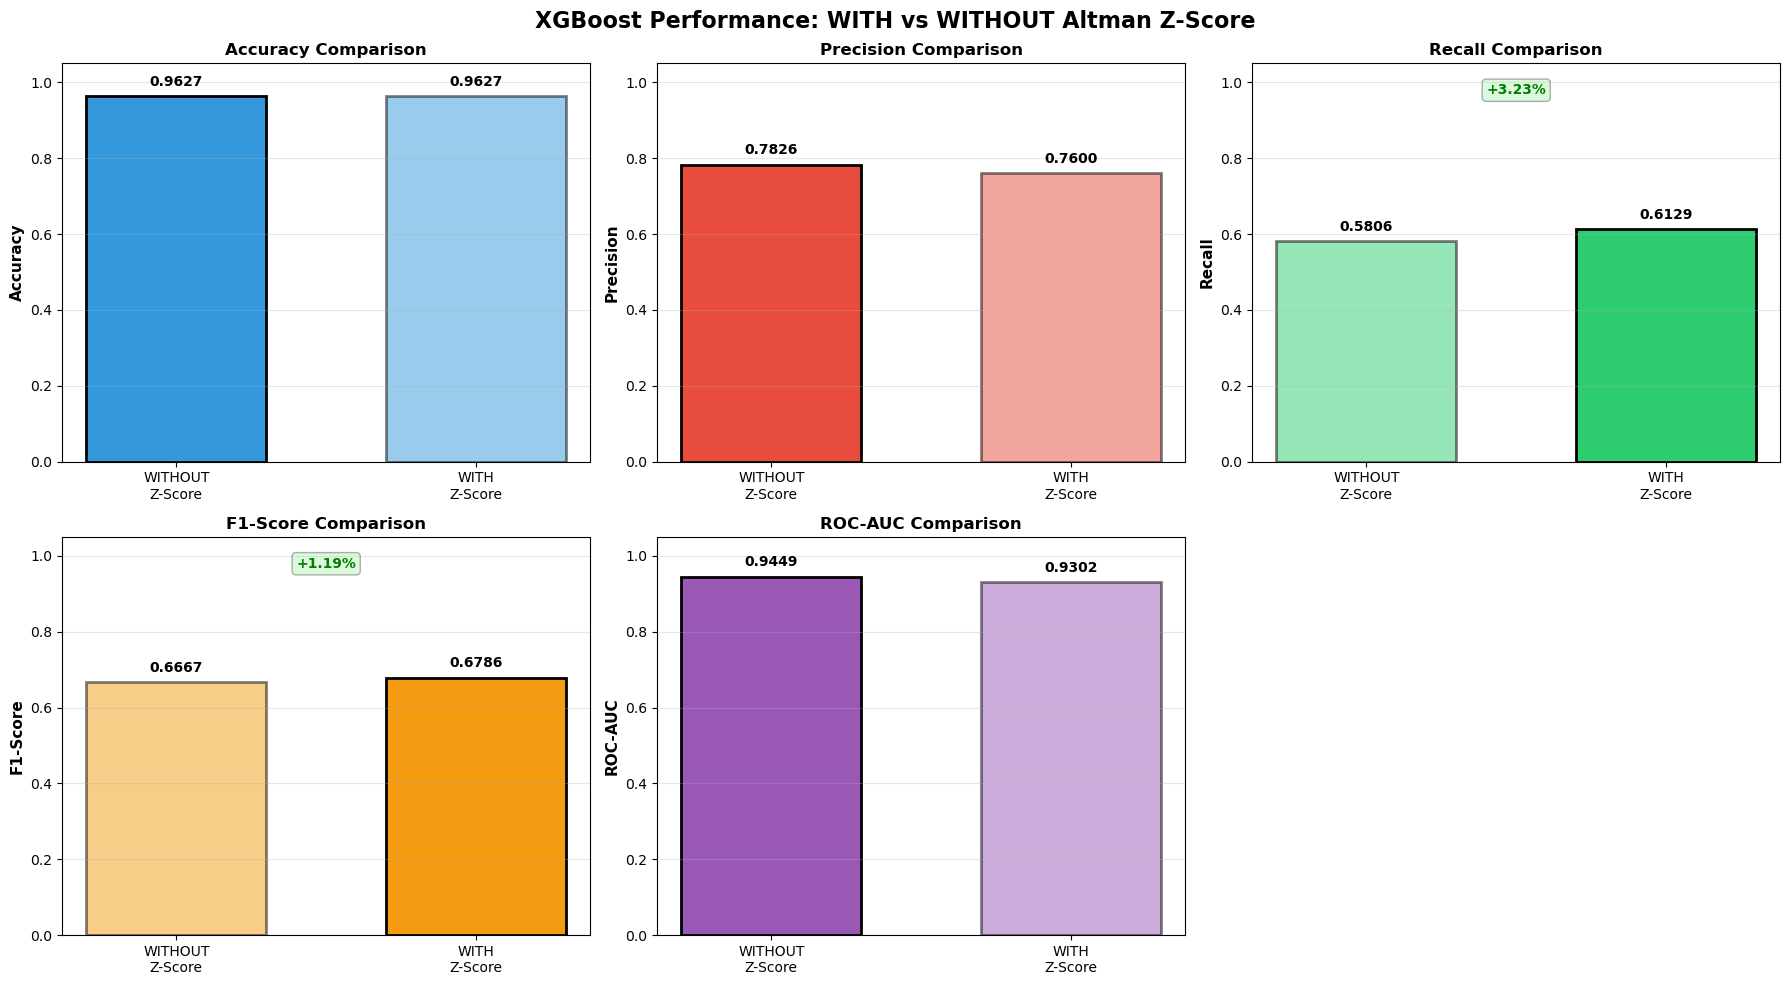

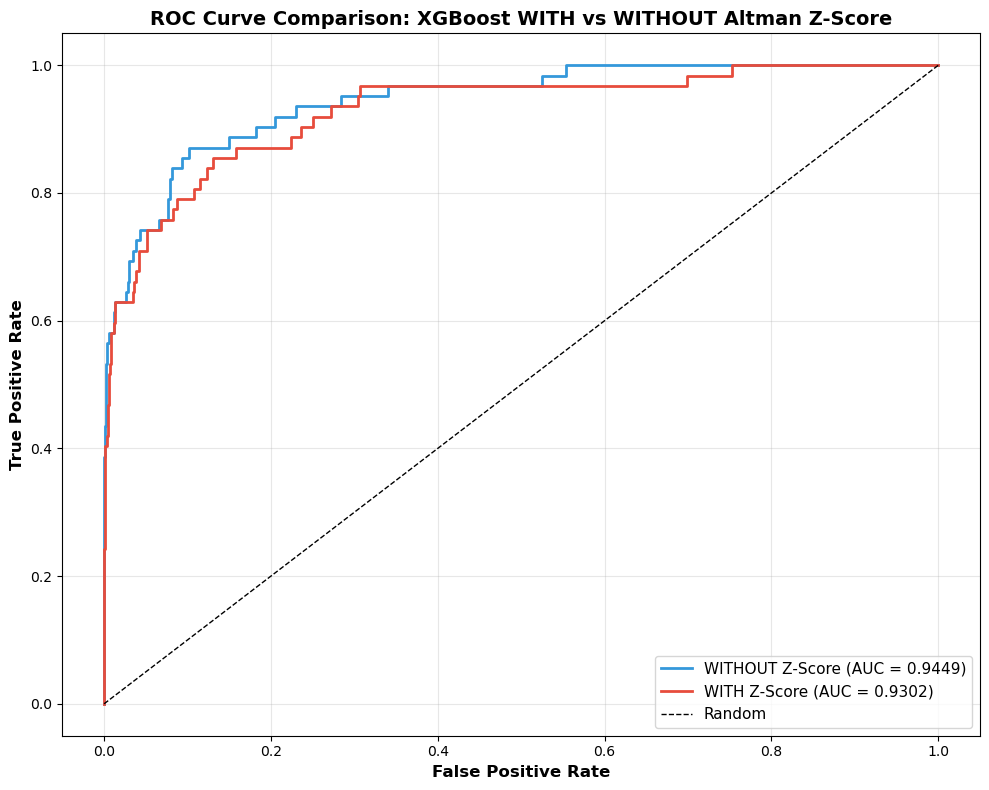

FEATURE IMPORTANCE ANALYSIS

Top 20 Features (WITH Z-Score model):
Feature  Importance
    X35    0.087969
    X39    0.078779
    X21    0.032710
    X41    0.029327
    X34    0.029085
    X46    0.027866
    X10    0.022665
    X27    0.022017
     X3    0.021309
    X51    0.018716
    X56    0.017518
    X14    0.016345
     X5    0.016337
    X26    0.016121
    X50    0.016102
    X64    0.015979
    X43    0.015636
    X13    0.014712
    X24    0.014171
     X6    0.014099


In [41]:
results = helper.compare_xgboost_with_without_zscore(data_imputation)

It seems that adding the Altman Z score feature yielded minor improvement in recall and f1 score.  
All other metrics are basically the same and with the roc curve looking extremely similar.  
The altman z score data does not seem to be used much based on the top 20 list of important features.  
Therefore, we will not use the altman z score data for bankrupcy prediction as there is no significant imporvement in the performance metric.    

We will now do some error analysis on the xgboost model with the imputed data.  

# Error Analysis

Accuracy: 0.9626556016597511

Confusion Matrix:
                 Predicted
                 Not Bankrupt  Bankrupt
Actual Not B.       892            10
Actual Bankrupt      26            36

Detailed Breakdown:
  True Negatives (TN):   892 - Correctly predicted NOT bankrupt
  False Positives (FP):   10 - Incorrectly predicted bankrupt (Type I error)
  False Negatives (FN):   26 - Missed bankruptcies (Type II error)
  True Positives (TP):    36 - Correctly predicted bankrupt

Error Rates:
  False Positive Rate: 0.0111 (10 out of 902 non-bankrupt)
  False Negative Rate: 0.4194 (26 out of 62 bankrupt)
  Missed Bankruptcy Cost: 26 companies we failed to catch
FALSE NEGATIVE ANALYSIS (Missed Bankruptcies)

Missed 26 out of 62 bankruptcies
Miss rate: 41.9%

Prediction Probability Distribution for False Negatives:
count    26.000000
mean      0.116445
std       0.143561
min       0.000673
25%       0.008440
50%       0.043933
75%       0.188045
max       0.475460
Name: Pred_Proba, dtype: flo

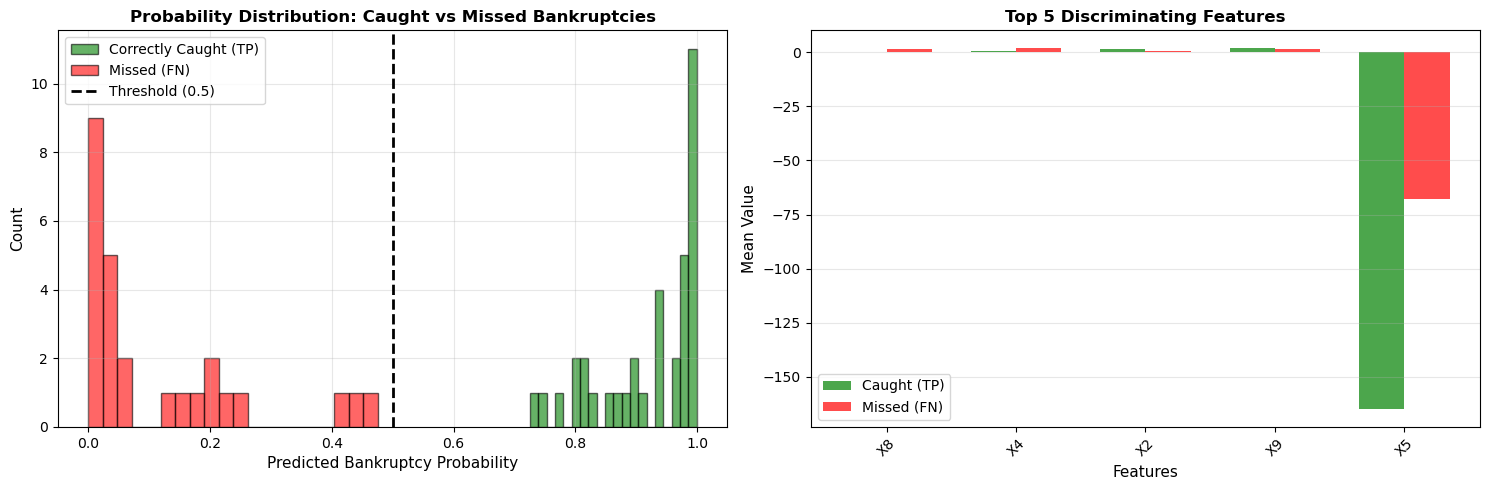

FALSE POSITIVE ANALYSIS (False Alarms)

False alarms: 10 out of 902 non-bankrupt
False positive rate: 1.1%


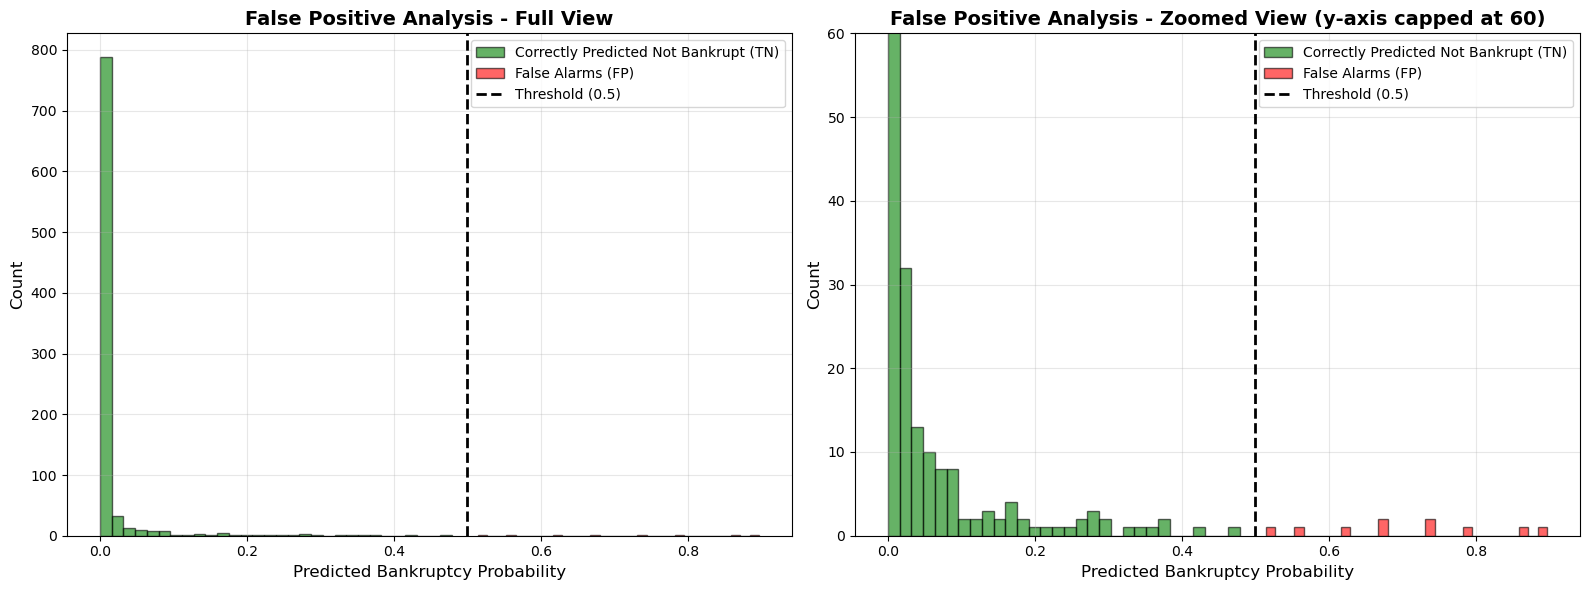


Calibration Analysis:
If model is well-calibrated, Actual_Rate ≈ Predicted_Rate
            Actual_Bankruptcies  Total_Count  Actual_Rate  Predicted_Rate
Prob_Bin                                                                 
(0.0, 0.1]                   16          875       0.0183            0.05
(0.1, 0.2]                    4           20       0.2000            0.15
(0.2, 0.3]                    3           11       0.2727            0.25
(0.3, 0.4]                    0            7       0.0000            0.35
(0.4, 0.5]                    3            5       0.6000            0.45
(0.5, 0.6]                    0            2       0.0000            0.55
(0.6, 0.7]                    0            3       0.0000            0.65
(0.7, 0.8]                    4            7       0.5714            0.75
(0.8, 0.9]                    8           10       0.8000            0.85
(0.9, 1.0]                   24           24       1.0000            0.95

 Calibration Metrics:
  Expect

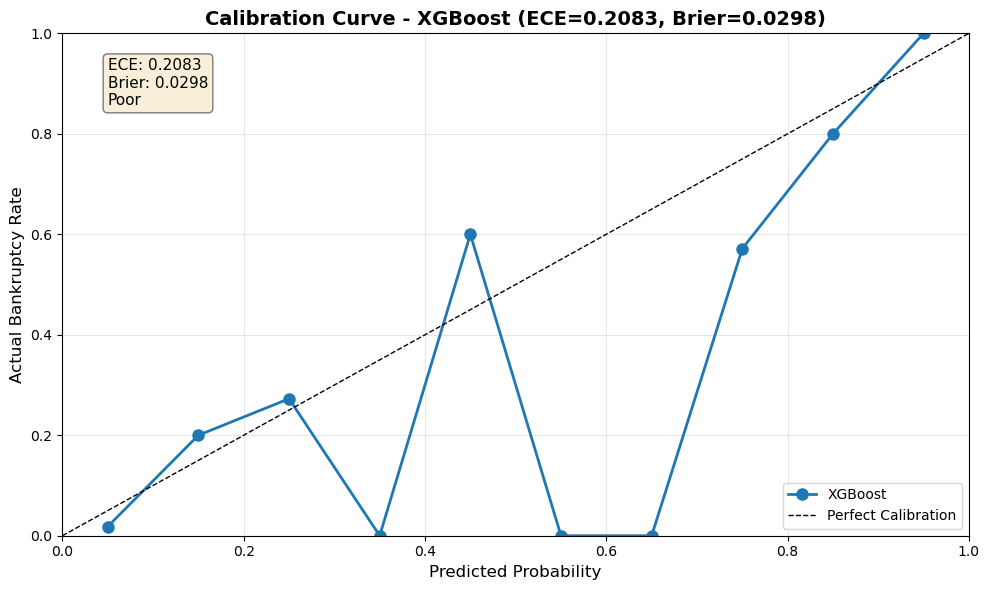

THRESHOLD SENSITIVITY ANALYSIS

Impact of Different Thresholds:
Threshold    Accuracy     Precision    Recall       F1-Score     FN (Missed)     FP (False Alarms)
--------------------------------------------------------------------------------
0.20         0.9512       0.6087       0.6774       0.6412       20              27             
0.25         0.9512       0.6154       0.6452       0.6299       22              25             
0.30         0.9564       0.6724       0.6290       0.6500       23              19             
0.40         0.9637       0.7647       0.6290       0.6903       23              12             
0.50         0.9627       0.7826       0.5806       0.6667       26              10             
0.60         0.9647       0.8182       0.5806       0.6792       26              8              


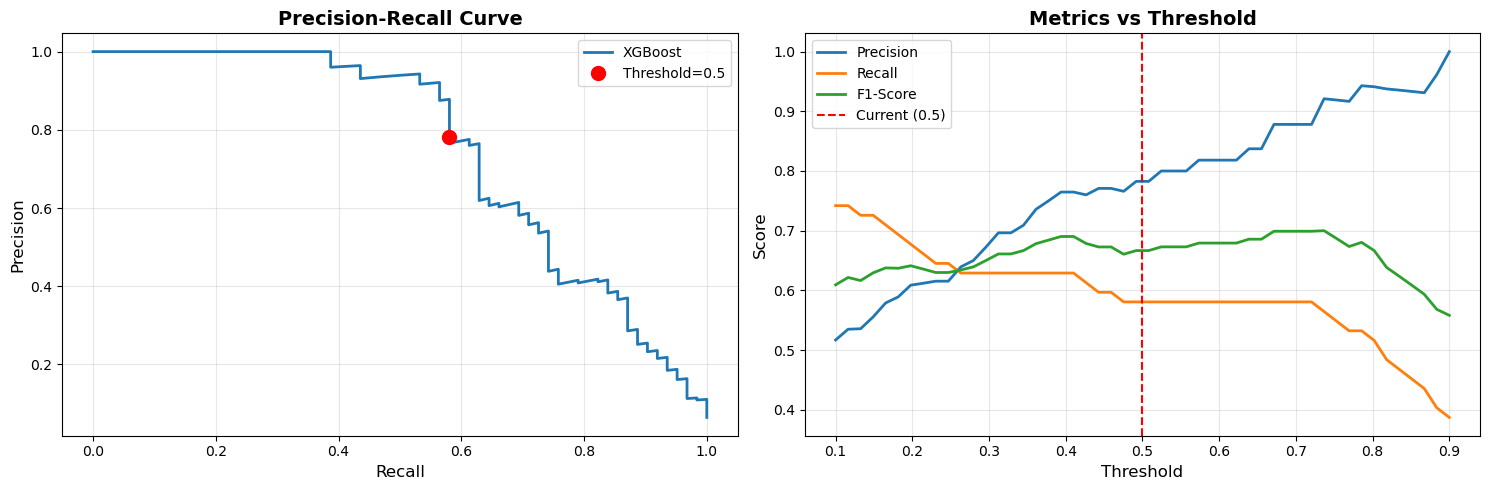


Metric          In-Sample (CV Mean)       Out-of-Sample (Test)      Difference     
--------------------------------------------------------------------------------
Precision           0.7959 ± 0.0835        0.7826              ↓ 0.0133
Recall              0.4722 ± 0.0205        0.5806              ↑ 0.1085
F1-Score            0.5903 ± 0.0219        0.6667              ↑ 0.0764


In [45]:
model_1 = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=5.0,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss'
    )
result_1 = helper.error_analysis(data_imputation, model_1)

The ECE ( Expected Calibration Error) is the average deviation from perfect calibration and the brier score is the mean squared error of probability predictions.  
After looking into this, it seems that a Brier score of less than 0.3 or 0.2 is acceptable.  
These values allows numerical comparison of the calibration quality which would be useful.  

First of all, the probability distribution plot shows that the probability mass is mostly centered near 0 or 1, which seems to be a common behavior for gradient boosting as it tends to push probabilties in the extreme ends.  
This could indicate that the model may be overconfident and would need some calibration.    
There is a clear separation between TP and FN baesed on the false positive analysis, which is good to see.     
The precision recall curve does look rough with the precision recall trade off not being optimal. 
The performance metric is similar for the insample and out of sample except for the recall, which is slightly higher than the in sample mean but nothing too dramatic.  

Also, although I got to know this a bit late, XGBoost does seem to handle missing values on its own by using 'Decision path learning'.  
Instead of filling in a value, XGBoost sends instances with missing values down a specific path in the decision tree, and uses loss minimization.  
Therefore we will also do error analysis using the same XGBoost model (model_1) with the original data (data) with missing values instead of the imputed data (data_imputation).  
Just a reminder that ID columns are already dropped in the 'data' set.

Accuracy: 0.9688796680497925

Confusion Matrix:
                 Predicted
                 Not Bankrupt  Bankrupt
Actual Not B.       892            10
Actual Bankrupt      20            42

Detailed Breakdown:
  True Negatives (TN):   892 - Correctly predicted NOT bankrupt
  False Positives (FP):   10 - Incorrectly predicted bankrupt (Type I error)
  False Negatives (FN):   20 - Missed bankruptcies (Type II error)
  True Positives (TP):    42 - Correctly predicted bankrupt

Error Rates:
  False Positive Rate: 0.0111 (10 out of 902 non-bankrupt)
  False Negative Rate: 0.3226 (20 out of 62 bankrupt)
  Missed Bankruptcy Cost: 20 companies we failed to catch
FALSE NEGATIVE ANALYSIS (Missed Bankruptcies)

Missed 20 out of 62 bankruptcies
Miss rate: 32.3%

Prediction Probability Distribution for False Negatives:
count    20.000000
mean      0.148150
std       0.186903
min       0.000252
25%       0.012527
50%       0.032548
75%       0.310304
max       0.467450
Name: Pred_Proba, dtype: flo

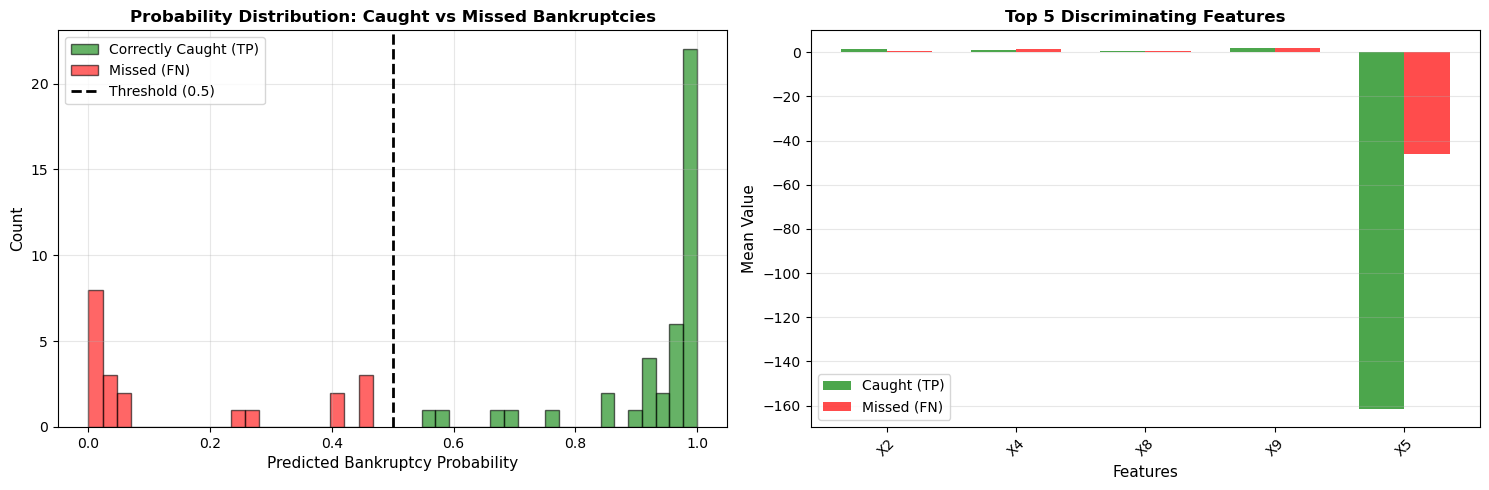

FALSE POSITIVE ANALYSIS (False Alarms)

False alarms: 10 out of 902 non-bankrupt
False positive rate: 1.1%


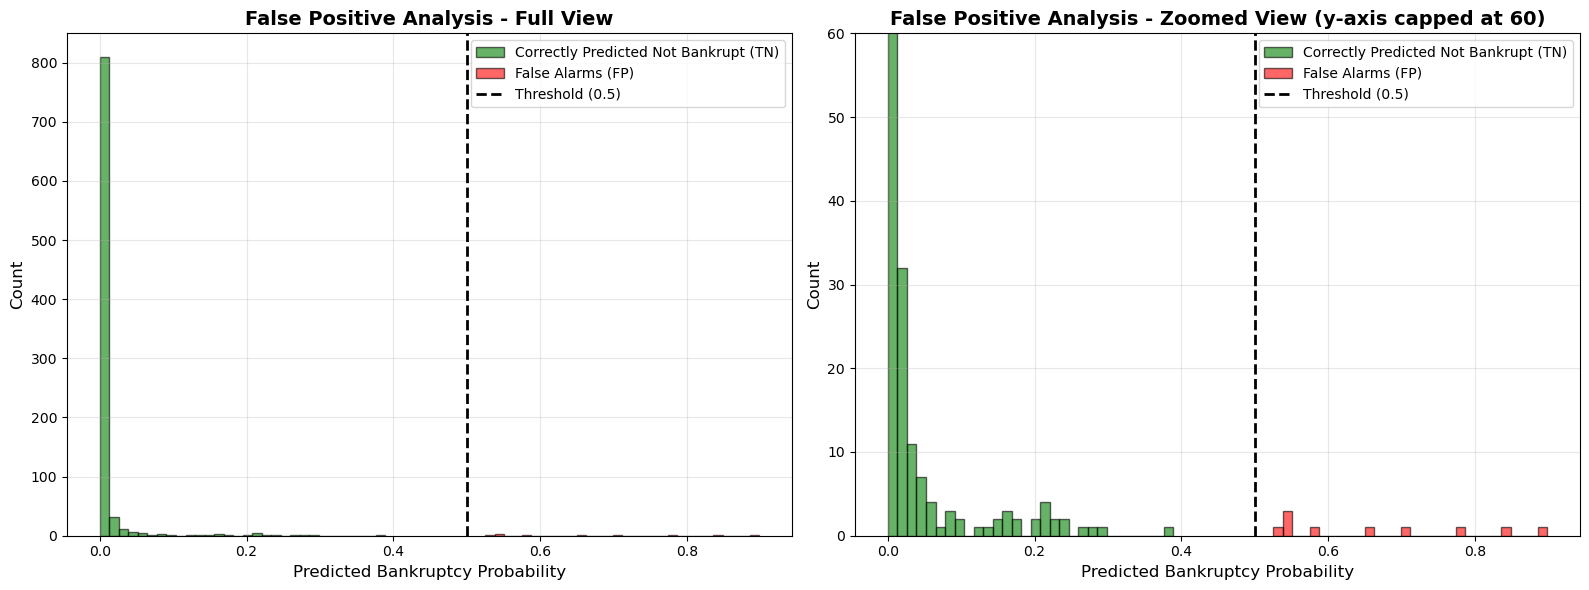


Calibration Analysis:
If model is well-calibrated, Actual_Rate ≈ Predicted_Rate
            Actual_Bankruptcies  Total_Count  Actual_Rate  Predicted_Rate
Prob_Bin                                                                 
(0.0, 0.1]                   13          882       0.0147            0.05
(0.1, 0.2]                    0            9       0.0000            0.15
(0.2, 0.3]                    2           15       0.1333            0.25
(0.3, 0.4]                    0            1       0.0000            0.35
(0.4, 0.5]                    5            5       1.0000            0.45
(0.5, 0.6]                    2            7       0.2857            0.55
(0.6, 0.7]                    2            3       0.6667            0.65
(0.7, 0.8]                    1            3       0.3333            0.75
(0.8, 0.9]                    3            5       0.6000            0.85
(0.9, 1.0]                   34           34       1.0000            0.95

 Calibration Metrics:
  Expect

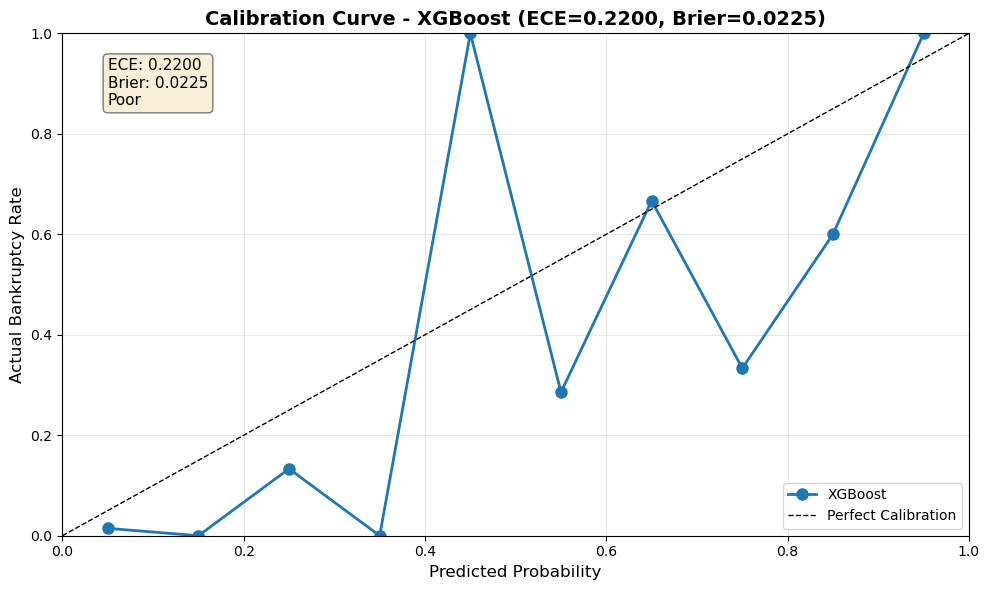

THRESHOLD SENSITIVITY ANALYSIS

Impact of Different Thresholds:
Threshold    Accuracy     Precision    Recall       F1-Score     FN (Missed)     FP (False Alarms)
--------------------------------------------------------------------------------
0.20         0.9616       0.6712       0.7903       0.7259       13              24             
0.25         0.9710       0.7742       0.7742       0.7742       14              14             
0.30         0.9730       0.8103       0.7581       0.7833       15              11             
0.40         0.9741       0.8246       0.7581       0.7899       15              10             
0.50         0.9689       0.8077       0.6774       0.7368       20              10             
0.60         0.9720       0.8889       0.6452       0.7477       22              5              


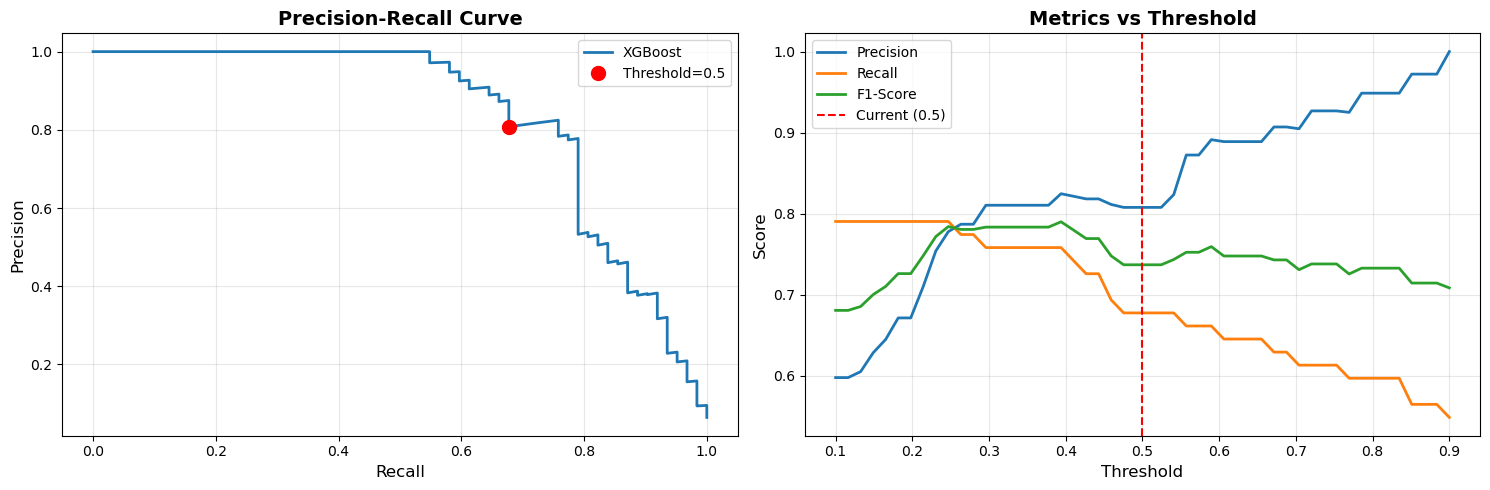


Metric          In-Sample (CV Mean)       Out-of-Sample (Test)      Difference     
--------------------------------------------------------------------------------
Precision           0.8221 ± 0.0519        0.8077              ↓ 0.0144
Recall              0.5752 ± 0.0879        0.6774              ↑ 0.1022
F1-Score            0.6739 ± 0.0723        0.7368              ↑ 0.0630


In [46]:
result_2 = helper.error_analysis(data, model_1)

At 0.5 threshold, using the XGBoost's imputation resulted in a recall score of 0.67, a noticable increase compared to 0.58 when using my imputation dataset.  
XGBoost managed to correctly identiy 6 more bankrupt companies and also improved the precision recall curve, without impacting the ECE and Brier score too much.  
This shows that imputation, is a crucial step and if done well can have a positive impact on the model's performance.  
While our recall score improved, the calibration and precision-recall curve for the model could be a bit better.  
The performance metric seems mostly similar for the in and out of sample wiht the recall score out of sample being slightly higher than the insample.  
So the model in general seems to do fine with out of sample data.  

**Maybe changing some parameters for the XGBoost model could be useful.*

N_estimators is the number of boosting rounds which is responsible for model complexity.  
Max_depth is the maximum number of levels or splits from the root node to the leaf nodes.  
Increasing max_depth makes the model more complex which can increase the likelihood of overfitting.  
learning rate is the shrinkage factor that scales down the contribution of each individual tree, making to model more conservative.  

*Scale_pos_weight we previously set to 5 considering we were told that it is 5 times worse to misidentify bankrupt companies.*  
*However, what if we set is as the ratio of number of negative class to positive class?*    
Since 6.4% are bankrupt and 93.6% are not, 93.6/6.4 is 14.6.    
We will change the scale_pos weight to 14.6.   

Subsample and colsample_bytree is bascially random samping of the training data.  
To make the model perform better with out of sample data, we should aim to make the model more generalized.  
To do this, we will experiment by reducing n_estimators from 200 to 100, max depth from 6 to 5, and learning_rate from 0.1 to 0.05.  
We will also set a small amount of L2 regualrization of 0.5.  
L2 regualrization may be more suited than L1 because as shown in the EDA section, we have correlated features.  
We also want a better calibrated curve which means we also watn our model to be more stable in its predictions.  
L2 would give us a more stable model that handles correlated features better than L1 if used correctly.  
Other parameters will be kept the same.  

Accuracy: 0.950207468879668

Confusion Matrix:
                 Predicted
                 Not Bankrupt  Bankrupt
Actual Not B.       869            33
Actual Bankrupt      15            47

Detailed Breakdown:
  True Negatives (TN):   869 - Correctly predicted NOT bankrupt
  False Positives (FP):   33 - Incorrectly predicted bankrupt (Type I error)
  False Negatives (FN):   15 - Missed bankruptcies (Type II error)
  True Positives (TP):    47 - Correctly predicted bankrupt

Error Rates:
  False Positive Rate: 0.0366 (33 out of 902 non-bankrupt)
  False Negative Rate: 0.2419 (15 out of 62 bankrupt)
  Missed Bankruptcy Cost: 15 companies we failed to catch
FALSE NEGATIVE ANALYSIS (Missed Bankruptcies)

Missed 15 out of 62 bankruptcies
Miss rate: 24.2%

Prediction Probability Distribution for False Negatives:
count    15.000000
mean      0.255729
std       0.173193
min       0.027588
25%       0.095157
50%       0.273530
75%       0.416949
max       0.498758
Name: Pred_Proba, dtype: floa

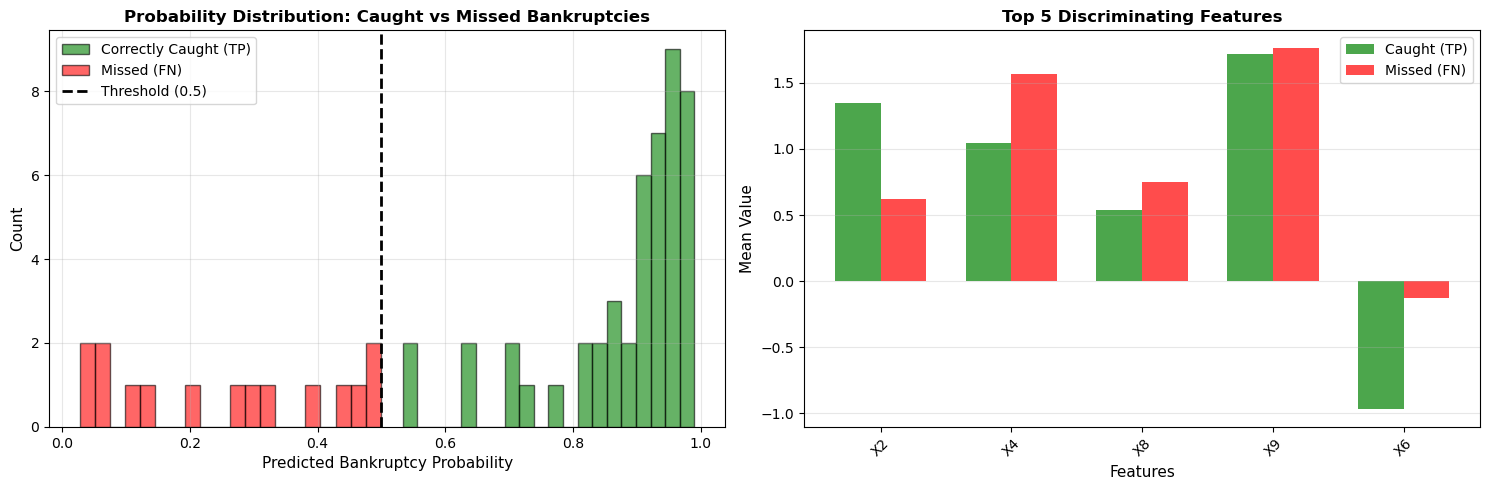

FALSE POSITIVE ANALYSIS (False Alarms)

False alarms: 33 out of 902 non-bankrupt
False positive rate: 3.7%


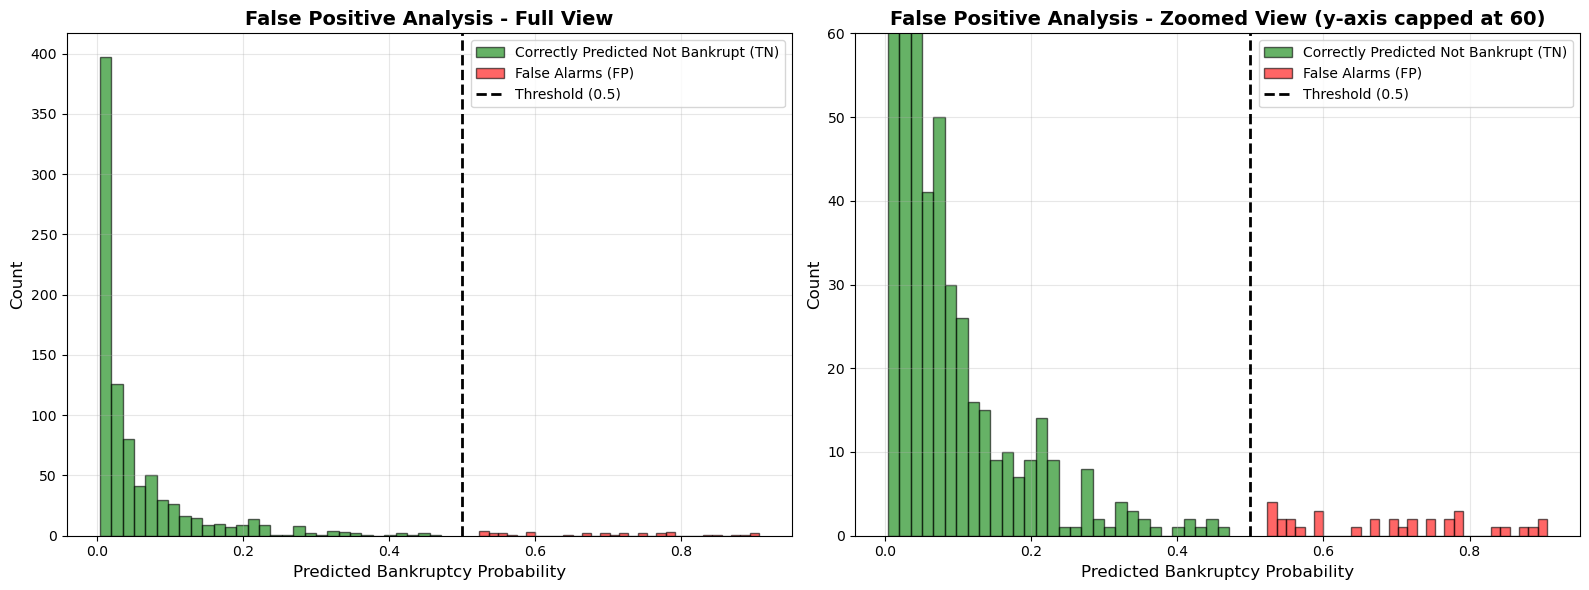


Calibration Analysis:
If model is well-calibrated, Actual_Rate ≈ Predicted_Rate
            Actual_Bankruptcies  Total_Count  Actual_Rate  Predicted_Rate
Prob_Bin                                                                 
(0.0, 0.1]                    4          729       0.0055            0.05
(0.1, 0.2]                    2           88       0.0227            0.15
(0.2, 0.3]                    2           42       0.0476            0.25
(0.3, 0.4]                    3           15       0.2000            0.35
(0.4, 0.5]                    4           10       0.4000            0.45
(0.5, 0.6]                    2           14       0.1429            0.55
(0.6, 0.7]                    2            7       0.2857            0.65
(0.7, 0.8]                    4           14       0.2857            0.75
(0.8, 0.9]                    9           13       0.6923            0.85
(0.9, 1.0]                   30           32       0.9375            0.95

 Calibration Metrics:
  Expect

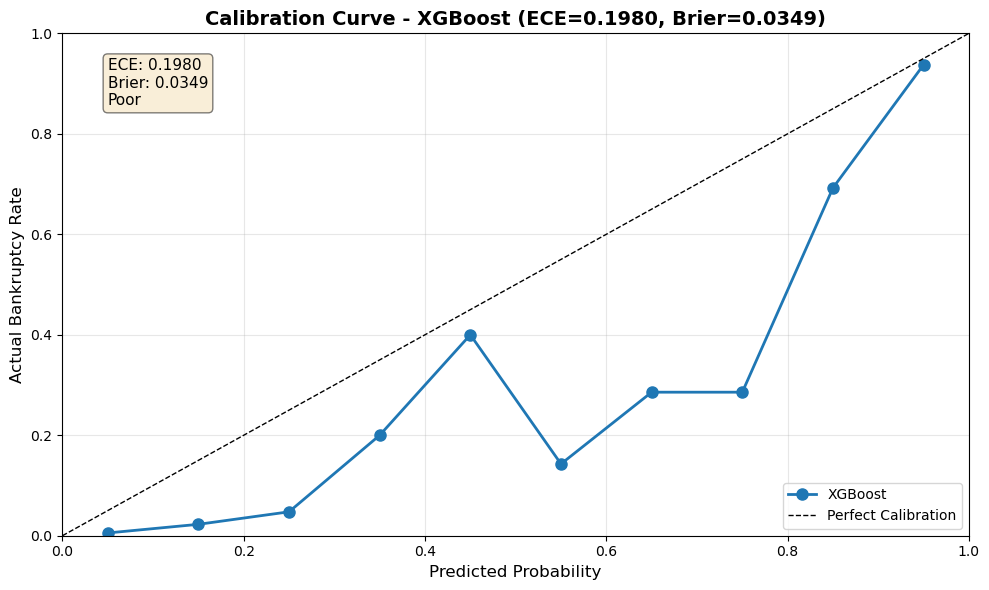

THRESHOLD SENSITIVITY ANALYSIS

Impact of Different Thresholds:
Threshold    Accuracy     Precision    Recall       F1-Score     FN (Missed)     FP (False Alarms)
--------------------------------------------------------------------------------
0.20         0.8994       0.3810       0.9032       0.5359       6               91             
0.25         0.9284       0.4701       0.8871       0.6145       7               62             
0.30         0.9388       0.5143       0.8710       0.6467       8               51             
0.40         0.9481       0.5667       0.8226       0.6711       11              39             
0.50         0.9502       0.5875       0.7581       0.6620       15              33             
0.60         0.9606       0.6818       0.7258       0.7031       17              21             


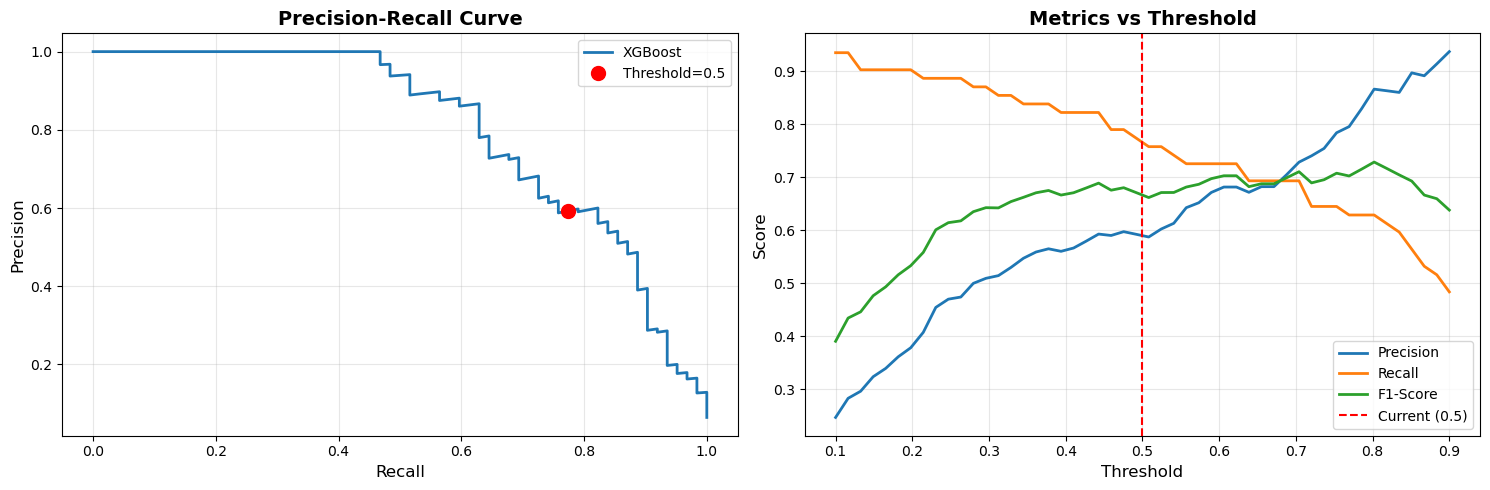


Metric          In-Sample (CV Mean)       Out-of-Sample (Test)      Difference     
--------------------------------------------------------------------------------
Precision           0.6049 ± 0.0310        0.5875              ↓ 0.0174
Recall              0.6644 ± 0.0811        0.7581              ↑ 0.0936
F1-Score            0.6308 ± 0.0424        0.6620              ↑ 0.0312


In [66]:
# Changed some hyperparameters
model_2 = XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.05,
        scale_pos_weight=14.6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda = 0.5,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss'
    )
result_3 = helper.error_analysis(data, model_2)

The insample and out of sample performance metric seem mostly the same again with the recall for out of sample being a bit higher than in sample.  
The model seems to be generalized well to perform good in out of sample data.  

The recall score at the 0.5 threshold increased again form 0.67 to 0.758 and there are other significant changes.  
First there are minimal changes to the ECE score.  
**More importantly, in the Metics vs Threshold graph, we see that there has been an improvement in the precision vs recall tradeoff depending on thresholds.**  
Previously using model_1, the maximum recall score we can achieve was less than 0.8 unless we set the threshold to basically zero.  
However, using model_2 with new hyperparameters, we can easily achieve a recall score of 0.8 with a 0.2 threshold.  

The evidence is from the distribution of the False negatives in the probability distribution plot.  
The false negatives using model_2 is more spread out from 0 to 0.5 threshold compared to when we used model_1 while the model still generally maintains confidence in its true positives prediction.  
This shows that improving the model's calibration can not only help with the model's performance, but also improve its generalization capabilities.  
It also seems that considering the distributions of majority and minority classes correctly and making them represented in the model is also very important.  
Moreover, adding a bit of regularization helped improve the calibration curve, which is shown by the reduced expected calibtration error (ece) and the brier score is still good. 

**Because we can assume that its 5 times worse to misidentify bankrupcy, I think we want 5 times more False positive than False negatives.**  
Based on the threshold sensitivity analysis, 0.3 threshold seems to be the best choice.   

Before finalizing the parameters, lets run a randomized search to see which parameters are most optimal.  
We will use randomized search and stratifiedkfold with 5 splits to ensure our split has same distributions.  
The scoring parameter is also included so we optimize for recall score.  
We will also include the reg_lamda, which is the regulaization parameter and colsample_by tree, which is the fraction of features used to train a tree, to see if this will improve the model's performance.  
After we get the parameters, we will do error analysis again.  


In [57]:

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
import pandas as pd
import numpy as np

# DATA
X = data.drop(columns=['Bankrupt'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42, stratify=y
    )


# DEFINE PARAMETER GRID
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_lambda': [0, 0.5, 1, 2, 5],
    'scale_pos_weight': [3, 5, 7, 10, 15],
}

# Base XGBoost model
base_model = XGBClassifier(
    scale_pos_weight = 14.6,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss',
    subsample=0.8  # Fixed parameter
)

scoring = make_scorer(recall_score)

# Stratified K-Fold for cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
# n_iter: number of random combinations to try (adjust based on time/compute)
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=100,              
    scoring=scoring,         # Optimize for recall
    cv=cv_strategy,          
    random_state=42,
    n_jobs=-1,               
    return_train_score=True  # Track training scores too
)


# RUN SEARCH

random_search.fit(X_train, y_train)

# DISPLAY RESULTS

print("\nBest Parameters:")
for param, value in random_search.best_params_.items():
    print(f"  {param:20s}: {value}")

print(f"\nBest Cross-Validation Recall Score: {random_search.best_score_:.4f}")


# Get best model
best_model = random_search.best_estimator_

# Make predictions on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nTest Set Performance:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\nConfusion Matrix:")
print(f"  TN={tn}, FP={fp}")
print(f"  FN={fn}, TP={tp}")
print(f"  Caught {tp}/{tp+fn} bankruptcies ({tp/(tp+fn)*100:.1f}%)")

# Return results
search_results = {
    'best_model': best_model,
    'best_params': random_search.best_params_,
    'best_score': random_search.best_score_,
    'cv_results': results_df,
    'test_accuracy': accuracy,
    'test_recall': recall,
    'test_precision': precision,
    'test_f1': f1
}

search_results

,estimator,"XGBClassifier...state=42, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.7, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], 'n_estimators': [100, 200, ...], ...}"
,n_iter,100
,scoring,make_scorer(r...hod='predict')
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan



Best Parameters:
  scale_pos_weight    : 15
  reg_lambda          : 2
  n_estimators        : 300
  max_depth           : 4
  learning_rate       : 0.01
  colsample_bytree    : 0.6

Best Cross-Validation Recall Score: 0.7517

Test Set Performance:
  Accuracy:  0.9346
  Precision: 0.4952
  Recall:    0.8387
  F1-Score:  0.6228
  ROC-AUC:   0.9618

Confusion Matrix:
  TN=849, FP=53
  FN=10, TP=52
  Caught 52/62 bankruptcies (83.9%)


{'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.01, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=300,
               n_jobs=-1, num_parallel_tree=None, random_state=42, ...),
 'best_params': {'scale_pos_weight': 15,
  'reg_lambda': 2,
  'n_estimators': 300,
  'max_depth': 4,
  'learning_rate': 0.01,
  'colsample_bytree': 0.6},
 'best_score': np.float64(0.751673469387755),
 'cv_results':      

Accuracy: 0.9346473029045643

Confusion Matrix:
                 Predicted
                 Not Bankrupt  Bankrupt
Actual Not B.       849            53
Actual Bankrupt      10            52

Detailed Breakdown:
  True Negatives (TN):   849 - Correctly predicted NOT bankrupt
  False Positives (FP):   53 - Incorrectly predicted bankrupt (Type I error)
  False Negatives (FN):   10 - Missed bankruptcies (Type II error)
  True Positives (TP):    52 - Correctly predicted bankrupt

Error Rates:
  False Positive Rate: 0.0588 (53 out of 902 non-bankrupt)
  False Negative Rate: 0.1613 (10 out of 62 bankrupt)
  Missed Bankruptcy Cost: 10 companies we failed to catch
FALSE NEGATIVE ANALYSIS (Missed Bankruptcies)

Missed 10 out of 62 bankruptcies
Miss rate: 16.1%

Prediction Probability Distribution for False Negatives:
count    10.000000
mean      0.322866
std       0.119596
min       0.162483
25%       0.208948
50%       0.318554
75%       0.432994
max       0.464339
Name: Pred_Proba, dtype: flo

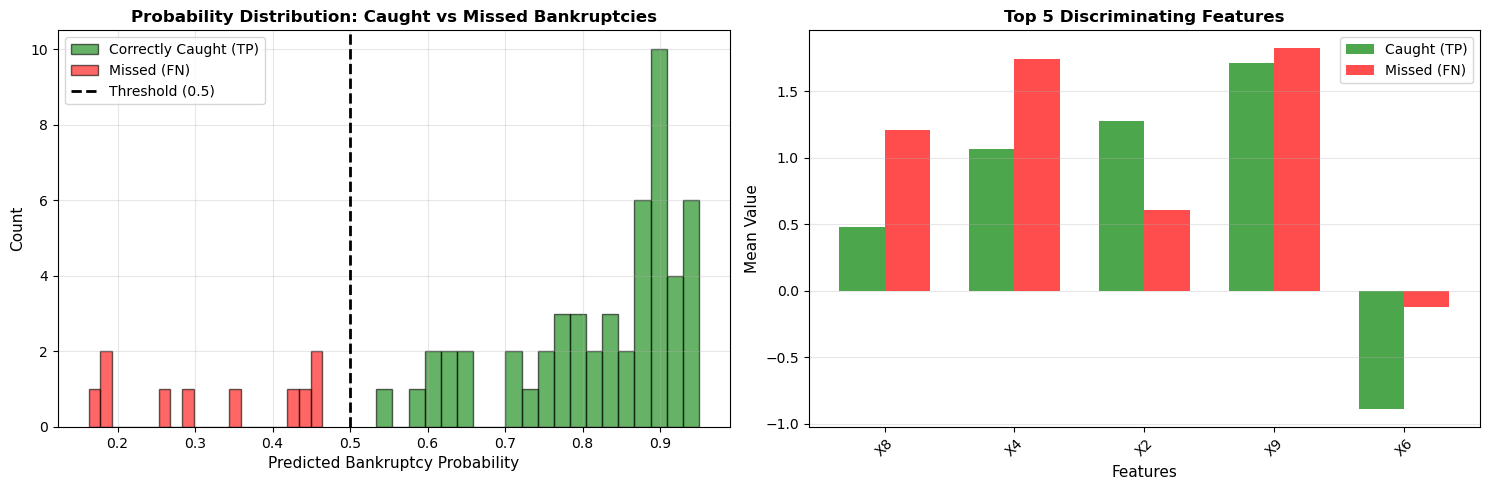

FALSE POSITIVE ANALYSIS (False Alarms)

False alarms: 53 out of 902 non-bankrupt
False positive rate: 5.9%


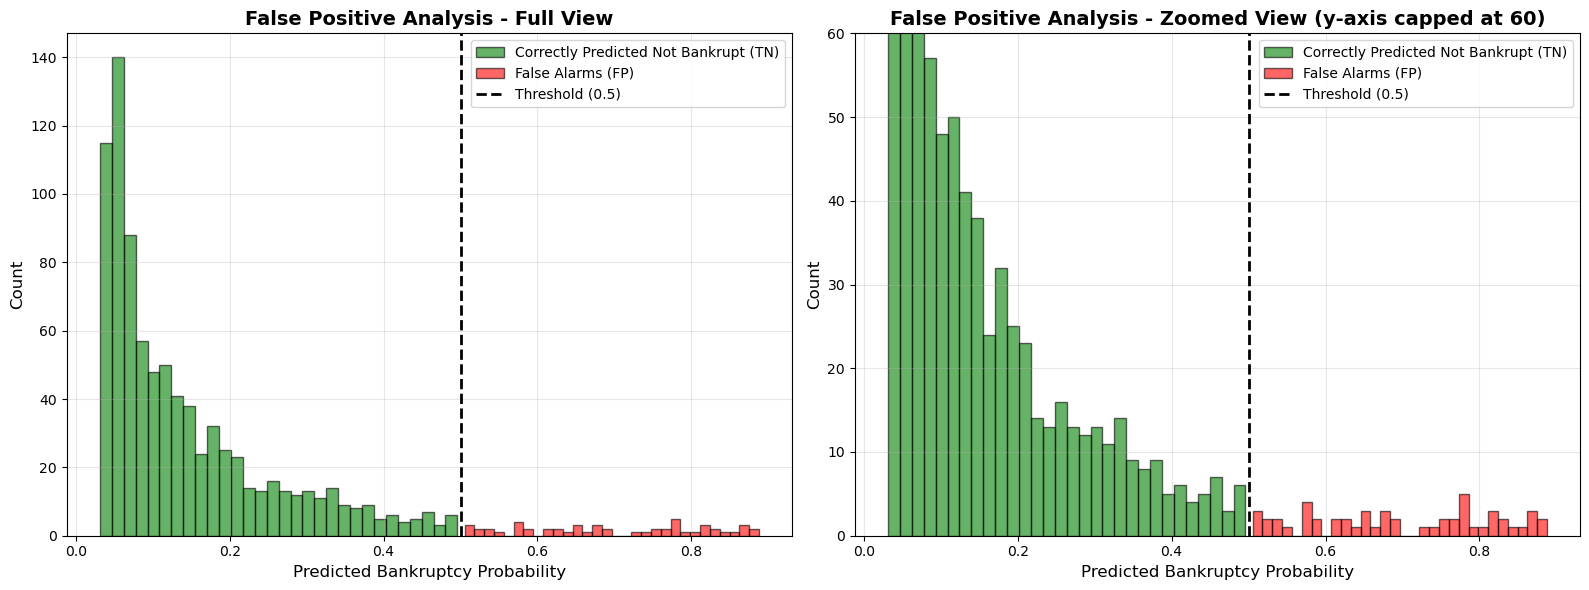


Calibration Analysis:
If model is well-calibrated, Actual_Rate ≈ Predicted_Rate
            Actual_Bankruptcies  Total_Count  Actual_Rate  Predicted_Rate
Prob_Bin                                                                 
(0.0, 0.1]                    0          426       0.0000            0.05
(0.1, 0.2]                    3          235       0.0128            0.15
(0.2, 0.3]                    2           99       0.0202            0.25
(0.3, 0.4]                    1           62       0.0161            0.35
(0.4, 0.5]                    4           37       0.1081            0.45
(0.5, 0.6]                    2           16       0.1250            0.55
(0.6, 0.7]                    6           20       0.3000            0.65
(0.7, 0.8]                   10           22       0.4545            0.75
(0.8, 0.9]                   20           33       0.6061            0.85
(0.9, 1.0]                   14           14       1.0000            0.95

 Calibration Metrics:
  Expect

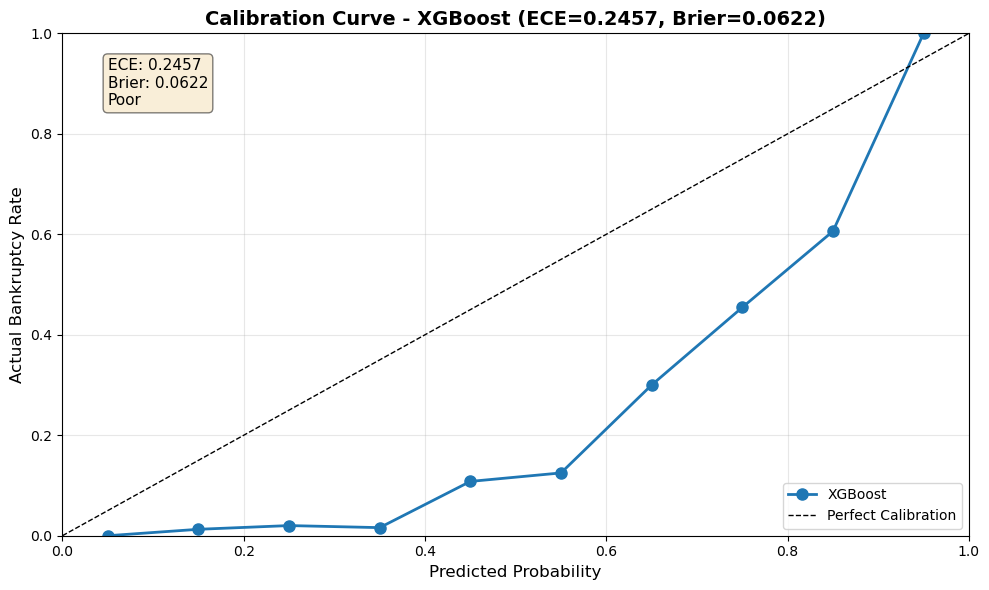

THRESHOLD SENSITIVITY ANALYSIS

Impact of Different Thresholds:
Threshold    Accuracy     Precision    Recall       F1-Score     FN (Missed)     FP (False Alarms)
--------------------------------------------------------------------------------
0.20         0.7438       0.1947       0.9516       0.3233       3               244            
0.25         0.7967       0.2341       0.9516       0.3758       3               193            
0.30         0.8423       0.2794       0.9194       0.4286       5               147            
0.40         0.9046       0.3944       0.9032       0.5490       6               86             
0.50         0.9346       0.4952       0.8387       0.6228       10              53             
0.60         0.9471       0.5618       0.8065       0.6623       12              39             


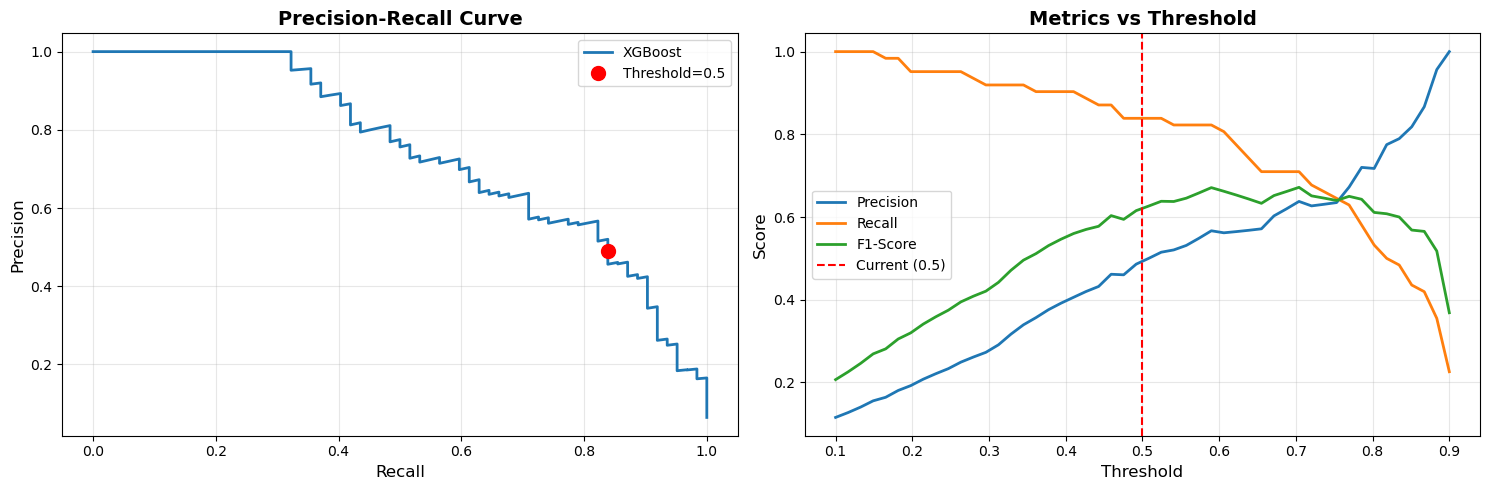


Metric          In-Sample (CV Mean)       Out-of-Sample (Test)      Difference     
--------------------------------------------------------------------------------
Precision           0.4348 ± 0.0491        0.4952              ↑ 0.0605
Recall              0.7349 ± 0.0684        0.8387              ↑ 0.1038
F1-Score            0.5443 ± 0.0483        0.6228              ↑ 0.0785


In [ ]:
# Error analysis of the given optimized parameters (changed parameters indicated by "optimized")
model_3 = XGBClassifier(
        n_estimators=300, # "optimized"
        max_depth=4,  # "optimized"
        learning_rate=0.01, # "optimized"
        scale_pos_weight=15,  # "optimized"
        reg_lambda = 2,  # "optimized"
        subsample=0.8,
        colsample_bytree=0.6,  # "optimized"
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss'
    )
result_4 = helper.error_analysis(data, model_3)
  

The given optimized parameters doesn't seem to be performing well.  
When we looking at the probability distribution, on the surface it looks better at distinguishing true positive and false negatives at the defualt 0.5 threshold.  
However, the calibration and precision recall curve is worse.  The confusion matrix and false positive analysis shows that there are too many increased false positives.  
It seems that the random search only optimized the recall score for the 0.5 threshold did not consider the recision-recall tradeoff.  
Maybe we need to take a different approach to tuning the hyperparameters.  
We will not use the "optimized" parameters given form the random search.

Lets try optimizing the calibration curve of model_2.  
Sklearn seems to have a calibrated classifer that can be used to improve the calibration of various models.  
Lets apply this to XGboost model_2 and see what happens.  
First we need to wrap the XGBoost model_2 to the calibrated classifer.  

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# 1. Stratified train/test split
X = data.drop(columns=['Bankrupt'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\n Isotonic calibration")

# Create unfitted model for calibration

model_2 = XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.05,
        scale_pos_weight=14.6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda = 0.5,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss'
    )
# Apply calibration
calibrated_model = CalibratedClassifierCV(
    estimator=model_2,
    method='isotonic',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)
calibrated_model.fit(X_train, y_train)
y_pred_cal = calibrated_model.predict(X_test)
y_proba_cal = calibrated_model.predict_proba(X_test)[:, 1]


 Isotonic calibration


ValueError: XGBClassifier should either be a classifier to be used with response_method=['decision_function', 'predict_proba'] or the response_method should be 'predict'. Got a regressor with response_method=['decision_function', 'predict_proba'] instead.

I tried to used the Calibrated Classifier with XGBoost but it seems like sklearn keeps recognizing XGBClassifer as a regressor.  
I tried asking the ai assistant but the solutions it gave does not seem to work.  I'm pretty sure XGBoost supports the SKlearn api but I don't know why this error occurs.  
Its my first time using XGBoost so maybe its something that I don't know.  

I will just use model_2 with its parameters.

## Submission

Run the following code cells below

In [ ]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import os
import math

%matplotlib inline

## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

data = data.apply(pd.to_numeric, errors='coerce')
data = data.drop('Id', axis=1)

X_full = data.drop(columns=['Bankrupt'])
y_full = data['Bankrupt']

from xgboost import XGBClassifier
final_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=14.6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda = 0.5,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)
final_model.fit(X_full, y_full)


In [ ]:
def MyModel(data, other={'model': final_model, 'threshold': 0.30}):
    """
    Parameters
    -----------
    data: a Pandas DataFrame
    other: a dict
        You can use this to pass any other arguments you find are necessary
        
    Returns
    -------
    pred: an array of predicted values
        The number of elements (i.e., predictions) is equal to the number of examples in the 'data' parameter
            i.e., one prediction per example
    """
    # The function should create an array of predictions; we initialize it to the empty array for convenience
    pred = []
    
    model = other.get('model', None)
    threshold = other.get('threshold', 0.30)
    
    data = data.apply(pd.to_numeric, errors='coerce')
    data = data.drop('Id', axis=1)
    
    y_proba = model.predict_proba(data)[:, 1]
    pred = (y_proba >= threshold).astype(int)
    
    
    return pred

In [ ]:

X_hold = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

# You may provide additional arguments to MyModel by placing them in the dict called other
# YOUR CODE HERE: replace the empty dict with your own.  You may leave it empty if no other arguments are needed
other = {'model': final_model, 'threshold': 0.30}

# Predict using MyModel
y_hold_pred = MyModel(X_hold, other)

# Compute metrics
# accuracy
accuracy_hold = accuracy_score(y_hold, y_hold_pred)

# recall_
recall_hold = recall_score(y_hold, y_hold_pred, pos_label=1, average="binary")

# precision
precision_hold = precision_score(y_hold, y_hold_pred, pos_label=1, average="binary")


print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_hold,
                                                                            r=recall_hold,
                                                                            p=precision_hold
                                                                            )
         )
